# <div style="text-align: center"><font color='#dc2624' face='consolas'>Seaborn 中</font></div>

## <font color='#dc2624' face='微软雅黑'>目录</font><a name='toc'></a>
### 1. [**<font color='#dc2624' face='微软雅黑'>Seaborn 101</font>**](#1)
1. [<font color='#2b4750' face='微软雅黑'>场景设定</font>](#1.1)
2. [<font color='#2b4750' face='微软雅黑'>风格设定</font>](#1.2)
3. [<font color='#2b4750' face='微软雅黑'>色调设定</font>](#1.3)
4. [<font color='#2b4750' face='微软雅黑'>图级轴级</font>](#1.4)
5. [<font color='#2b4750' face='微软雅黑'>Seaborn 数据集</font>](#1.5)


### 2. [**<font color='#dc2624' face='微软雅黑'>单图</font>**](#2)
1. [<font color='#2b4750' face='微软雅黑'>关系图</font>](#2.1)
2. [<font color='#2b4750' face='微软雅黑'>分布图</font>](#2.2)
3. [<font color='#2b4750' face='微软雅黑'>分类图</font>](#2.3)
4. [<font color='#2b4750' face='微软雅黑'>回归图</font>](#2.4)
5. [<font color='#2b4750' face='微软雅黑'>矩阵图</font>](#2.5)

### 3. [**<font color='#dc2624' face='微软雅黑'>组合图</font>**](#3)
1. [<font color='#2b4750' face='微软雅黑'>多图网格</font>](#3.1)
2. [<font color='#2b4750' face='微软雅黑'>配对网格</font>](#3.2)
3. [<font color='#2b4750' face='微软雅黑'>联合网格</font>](#3.3)

### [**<font color='#dc2624' face='微软雅黑'>Seaborn Cheatsheet</font>**](#cs)
---

<div style="text-align: right">If matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too.</div>

# <font color='#dc2624' face='微软雅黑'>1. Seaborn 101</font><a name='1'></a>
[<font color='black' face='微软雅黑'>回到目录</font>](#toc)

**`Seaborn`** 是基于 **`matplotlib`** 开发而用于统计可视化的高阶工具包，其官网地址是 https://seaborn.pydata.org/ 。
在使用 **`Seaborn`** 之前，需要引进它并检查它的版本，语法如下：

In [1]:
import seaborn
print( seaborn.__version__ )

0.11.0


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
np.random.seed(1031)

In [3]:
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False

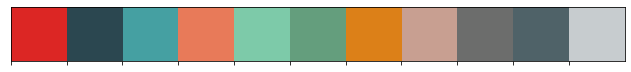

In [4]:
Hex_color = [ '#dc2624', '#2b4750', '#45a0a2', '#e87a59',
              '#7dcaa9', '#649E7D', '#dc8018', '#C89F91', 
              '#6c6d6c', '#4f6268', '#c7cccf' ]
sns.set_palette(Hex_color)
sns.palplot(sns.color_palette())

# <font color='#dc2624' face='微软雅黑'>2. 单图</font><a name='2'></a>
[<font color='black' face='微软雅黑'>回到目录</font>](#toc)

统计分析就是去理解一个数据集中变量之间的关系，以及这些关系如何受到其他变量的影响。 Seaborn 的主要用处就是可视化这个过程。当数据以恰当的方式展示出来时，读者可以直观地观察到某些趋势并发现变量之间的关系。

在 Seaborn 中绘图函数命名非常讲究，在顶层的 `relplot()`, `displot()` 和 `catplot()` 旨在绘制出关系图、分布图和分类图，而在每个函数中设置参数 kind 来细分具体图的类型，如下图所示。

<img src="Seaborn Function.png" style="width:50%; height:50%;">

除了在上述三种顶层函数中设置参数 kind，还可以用具体名称的函数实现相似的可视化目标，比如

        relplot()				-->  scatterplot()
        relplot(kind='scatter')	-->	 scatterplot()
        relplot(kind='line')	-->	 lineplot()

        displot()			    -->	 histplot()
        displot(kind='hist')	-->	 histplot()
        displot(kind='kde')		-->	 kdeplot()

        catplot()			    -->  stripplot()
        catplot(kind='strip')	-->	 stripplot()
        catplot(kind='swarm')	-->	 swarmplot()

本节分别从单图和组合图的角度来展示 Seaborn 的绘图功能，单图种类包括

- **关系图** (relational plot) 显示两个定量变量之间的关系
- **分布图** (distributional plot) 显示定量变量的分布
- **分类图** (categorical plot) 显示定量变量在分类变量下每个类别的分布
- **回归图** (regression plot) 包括线性回归图、多项式回归图和残差图
- **矩阵图** (matrix plot) 包括热力图和聚类图

### <font color='#2b4750' face='微软雅黑'>2.1 关系图</font><a name='2.1'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

为了可视化两个定量型变量之间的关系，Seaborn 提供了：

- 图级函数 `relplot()`
- 轴级函数 `scatterplot()` 和 `lineplot()`

其中在 `relplot()` 中可设置参数 `kind` (默认值是 `scatter`) 来确定具体的关系图，当

- `relplot(kind='scatter')` 等价于 `scatterplot()`，用来绘制散点图
- `relplot(kind='line')` 等价于 `lineplot()`，用来绘制线形图

### <font color='black' face='微软雅黑'>散点图</font>

散点图是可视化变量关系的最常见图类型。它使用散点描绘了两个变量的联合分布，其中每个点代表数据集中的一个样本观测值。 这种描述方式让读者从视觉上推断出大量信息，来判断两个变量之间是否存在某种有意义的关系。绘制散点图最简单的设定就是数据和横轴纵轴的变量名称，可以用图级和轴级函数绘制，两种等价语法代码如下：

- 图级函数：`sns.relplot(x='col_x', y='col_y', data=df)`
- 轴级函数：`sns.scatterplot(x='col_x', y='col_y', data=df)`

### <font color='red' face='微软雅黑'>使用数据</font>

**NBA 2019-2020 赛季常规赛球员技术统计数据**

该数据从 NBA 官网 https://www.nba.com/stats/leaders/ 下载并加工，记录了 30 支球队的 529 名球员在 2019-2020 赛季常规赛中的各项技术统计，比如排名 (RANK)、输赢场次 (W, L)、总分 (PTS)、总篮板 (REB)、总助攻 (AST)、效率 (+/-) 等等。

In [5]:
NBA = pd.read_csv('NBA.csv')
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  529 non-null    int64  
 1   PLAYER      529 non-null    object 
 2   TEAM        529 non-null    object 
 3   DIV         529 non-null    object 
 4   CONF        529 non-null    object 
 5   RANK        529 non-null    int64  
 6   AGE         529 non-null    int64  
 7   GP          529 non-null    int64  
 8   W           529 non-null    int64  
 9   L           529 non-null    int64  
 10  MIN         529 non-null    int64  
 11  PTS         529 non-null    int64  
 12  FGM         529 non-null    int64  
 13  FGA         529 non-null    int64  
 14  FG%         529 non-null    float64
 15  3PM         529 non-null    int64  
 16  3PA         529 non-null    int64  
 17  3P%         529 non-null    float64
 18  FTM         529 non-null    int64  
 19  FTA         529 non-null    i

In [6]:
NBA.head(3).append(NBA.tail(3))

,Unnamed: 0,PLAYER,TEAM,DIV,CONF,RANK,AGE,GP,W,L,...,FP,DD2,TD3,+/-,AVG PTS,AVG REB,AVG AST,AVG STL,AVG BLK,AVG PF
0,0,James Harden,HOU,Southwest,West,8,30,68,43,25,...,3885.2,22,4,286,34.338235,6.558824,7.529412,1.838235,0.882353,3.338235
1,1,Damian Lillard,POR,Northwest,West,15,29,66,33,33,...,3195.8,19,1,85,29.969697,4.303030,8.030303,1.060606,0.333333,1.727273
2,2,Devin Booker,PHX,Pacific,West,16,23,70,34,36,...,2840.4,11,0,130,26.614286,4.242857,6.514286,0.700000,0.257143,3.042857
526,526,Marques Bolden,CLE,Central,East,29,22,1,0,1,...,5.4,0,0,4,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000
527,527,Stanton Kidd,UTA,Northwest,West,10,28,4,3,1,...,3.1,0,0,-1,0.000000,0.750000,0.250000,0.000000,0.000000,0.750000
528,528,William Howard,HOU,Southwest,West,8,26,2,1,1,...,2.9,0,0,-16,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000


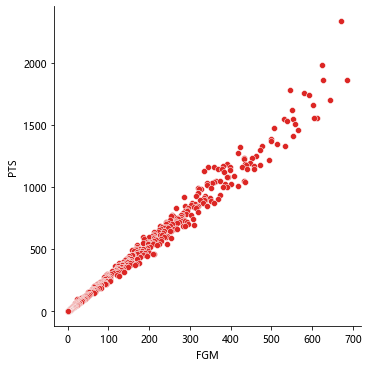

In [7]:
sns.relplot(x="FGM", y="PTS", data=NBA);

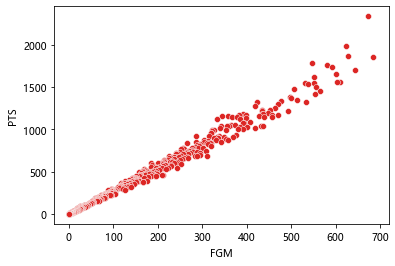

In [8]:
sns.scatterplot(x="FGM", y="PTS", data=NBA);

如果想查看在 NBA 东西部的情况，可将色调参数 hue 设置为 CONF (代表 conference，东部西部)，甚至还可以将风格参数 style 设置为 CONF。绘图逻辑也很简单，CONF 是个分类变量，取值 West 和 East。

- 如果色调 hue = ‘CONF’，当 CONF 属于 West 时用一种色调 (红)，当 CONF 属于 East 时用另一种色调 (蓝)
- 如果风格 style = ‘CONF’，当 CONF 属于 West 时用一种风格 (圆)，当 CONF 属于 East 时用另一种风格 (叉)

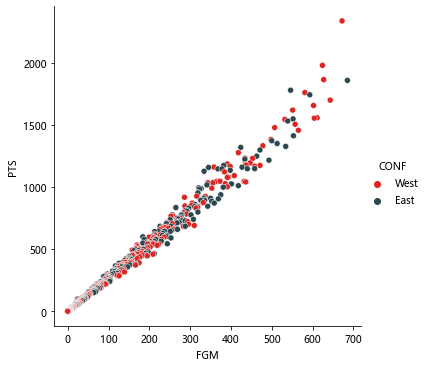

In [9]:
sns.relplot(x="FGM", y="PTS", hue="CONF", data=NBA);

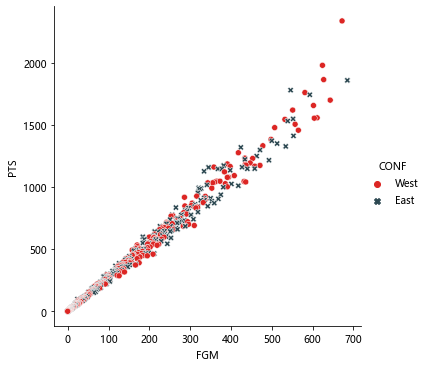

In [10]:
sns.relplot(x="FGM", y="PTS", hue="CONF", style="CONF", data=NBA);

除了色调和风格，还可设置尺寸参数 size 和调色盘参数 palette。

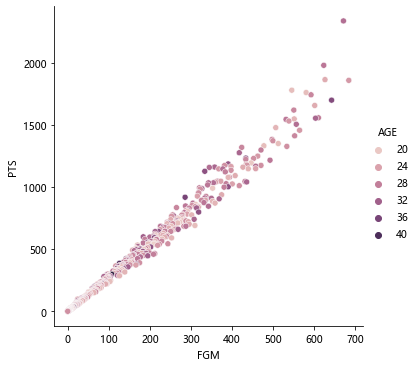

In [11]:
sns.relplot(x="FGM", y="PTS", hue="AGE", data=NBA);

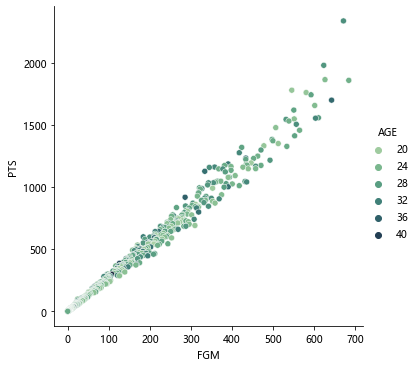

In [12]:
sns.relplot(x="FGM", y="PTS", hue="AGE", palette="ch:r=-.5,l=.75", data=NBA);

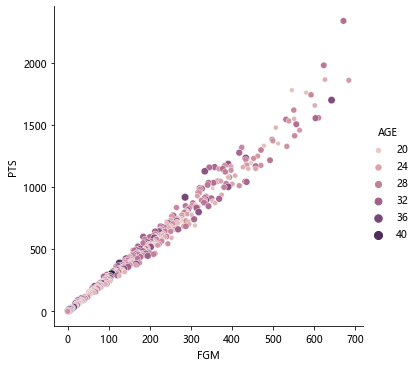

In [13]:
sns.relplot(x="FGM", y="PTS", hue='AGE', size="AGE", data=NBA);

当分类变量的类别值太多时，画在一幅图中会显得很乱而无法有效提取信息，这时可以绘制组合图。对于图级函数 relplot()，只需设置其参数 row, col 就可内部调用多图网格 FacetGrid 画出多图来。接下来按每个区 (division) 来画图，由于 NBA 总共分为六个区，西南、西北、太平洋、中部、东北和亚特兰大，可将参数 col 设置为 DIV，并且 col_wrap 设置为 3，意思是说按列排来画多图，但每行最多不能超过 3 列。

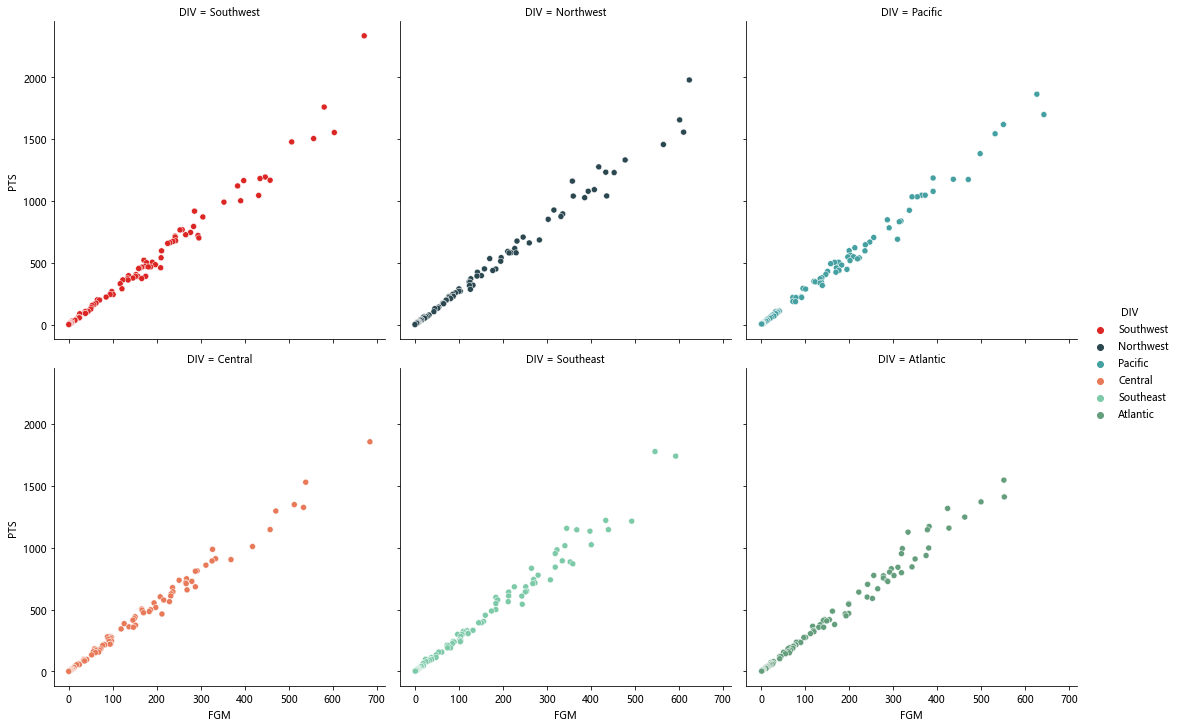

In [131]:
sns.relplot(x="FGM", y="PTS", hue='DIV', col="DIV", col_wrap=3, data=NBA);

### <font color='black' face='微软雅黑'>线形图</font>

散点图非常有效，但也不是可视化通用类型。在某些数据集中，读者可能想要理解某个变量随着时间的变化规律，或者想要理解某个连续型的变量。这种情况下，线形图是一个不错的选择。绘制线形图两种等价语法代码如下：

- 图级函数：`sns.relplot(x='col_x', y='col_y', data=df, kind='line')`
- 轴级函数：`sns.lineplot(x='col_x', y='col_y', data=df)`

### <font color='red' face='微软雅黑'>使用数据</font>

**2020 年 10 月货币对 EURUSD 和 USDSGD 分钟级数据**

该数据从 http://www.histdata.com/ 下载并加工。

In [15]:
EURUSD = pd.read_csv( 'EURUSD_M1_202010.csv' )
EURUSD['Minute Index'] = EURUSD['Minute'].apply(lambda x: str.replace(x,':','')).astype(int)
USDSGD = pd.read_csv( 'USDSGD_M1_202010.csv' )
USDSGD['Minute Index'] = USDSGD['Minute'].apply(lambda x: str.replace(x,':','')).astype(int)
df_pair = EURUSD.append(USDSGD)
df_pair['Date'] = pd.to_datetime(df_pair['Date'] )
df_pair.head(3).append(df_pair.tail(3))

,Pair,Date,Minute,Rate,Minute Index
0,EURUSD,2020-10-01,0:00,1.17423,0
1,EURUSD,2020-10-01,0:01,1.17419,1
2,EURUSD,2020-10-01,0:02,1.17422,2
23212,USDSGD,2020-10-23,16:55,1.35698,1655
23213,USDSGD,2020-10-23,16:56,1.35697,1656
23214,USDSGD,2020-10-23,16:57,1.35689,1657


In [16]:
df_pair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 23214
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Pair          47146 non-null  object        
 1   Date          47146 non-null  datetime64[ns]
 2   Minute        47146 non-null  object        
 3   Rate          47146 non-null  float64       
 4   Minute Index  47146 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 2.0+ MB


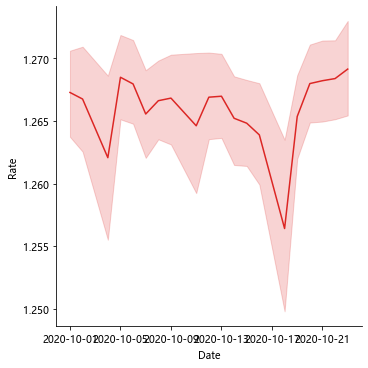

In [17]:
sns.relplot(x="Date", y="Rate", kind="line", data=df_pair);

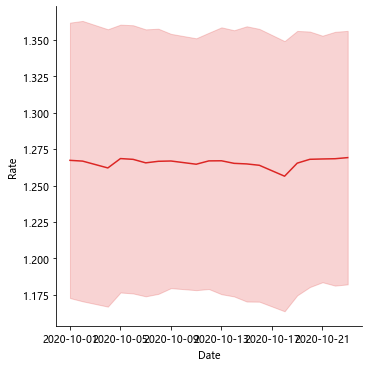

In [18]:
sns.relplot(x="Date", y="Rate", kind="line", ci="sd", data=df_pair);

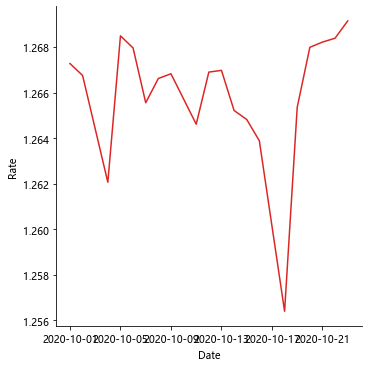

In [19]:
sns.relplot(x="Date", y="Rate", kind="line", ci=None, data=df_pair);

其实 df_pair 数据中有两个货币对， EURUSD 和 USDSGD，它们的量纲不一样大，因此混着画出来毫无任何价值，下图用参数 hue 来区分货币对。

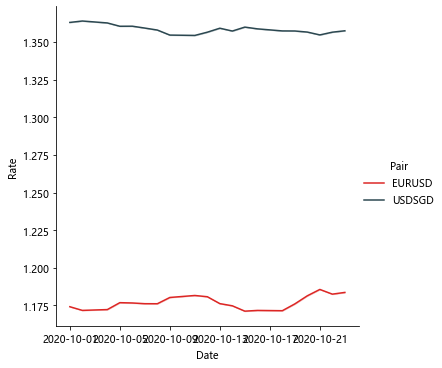

In [20]:
sns.relplot(x="Date", y="Rate", kind="line", hue="Pair", data=df_pair);

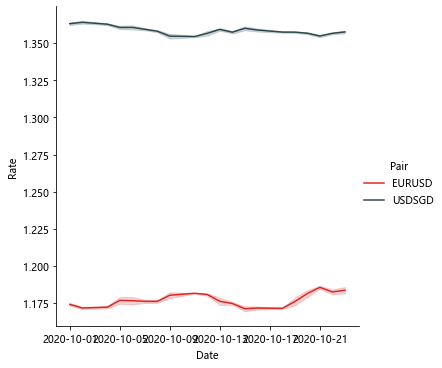

In [21]:
sns.relplot(x="Date", y="Rate", kind="line", hue="Pair", ci='sd', data=df_pair);

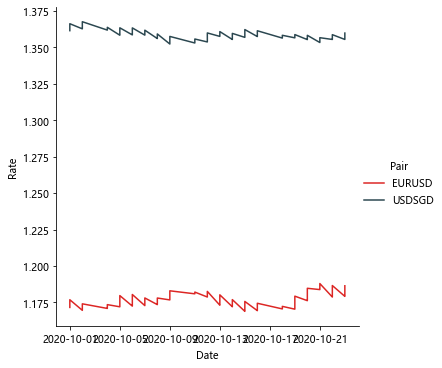

In [22]:
sns.relplot(x="Date", y="Rate", kind="line", hue="Pair", estimator=None, data=df_pair);

上两图虽然画出了每个货币对的汇率，但是由于其量纲不一致，两条折线放在一张图中相隔很远不美观。可用设置参数 col 为 ‘Pair’ 绘制多图，但发现两幅图共用纵轴，使得两条折现还是在两图的两端。

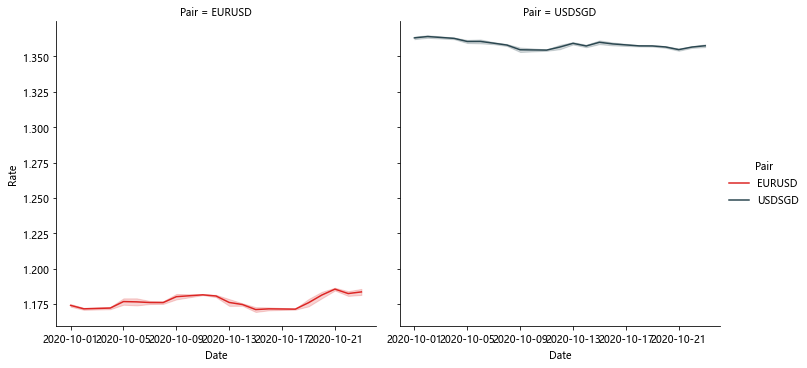

In [23]:
sns.relplot(data=df_pair, x="Date", y="Rate", kind="line", ci='sd', col='Pair', hue='Pair');

当需要客制化绘图时，用轴级函数更方便些。实际上该数据横轴的日期重叠，因此将图拉宽并且两幅图按行来拼叠效果会更好些。

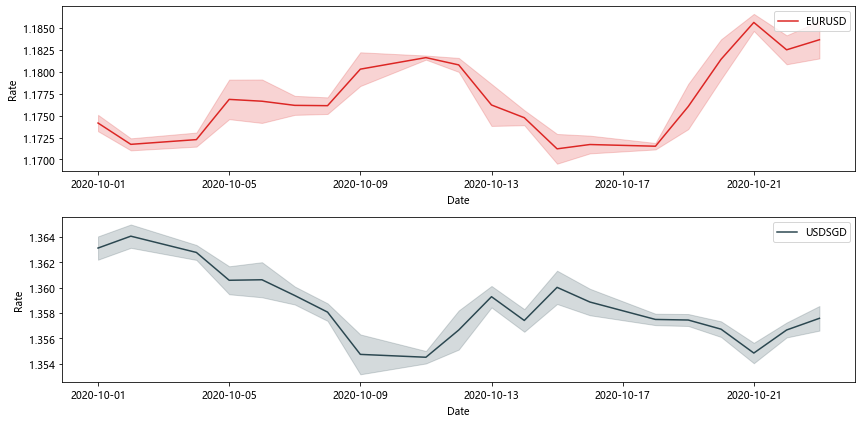

In [24]:
f, axs = plt.subplots(2, 1, figsize=(12, 6))
pairs = ['EURUSD', 'USDSGD']
for c, ax, pair in zip(Hex_color, axs, pairs):
    sns.lineplot(x="Date", y="Rate", ci='sd', data=df_pair.query(f"Pair=='{pair}'"), ax=ax, color=c, label=pair); 
f.tight_layout()

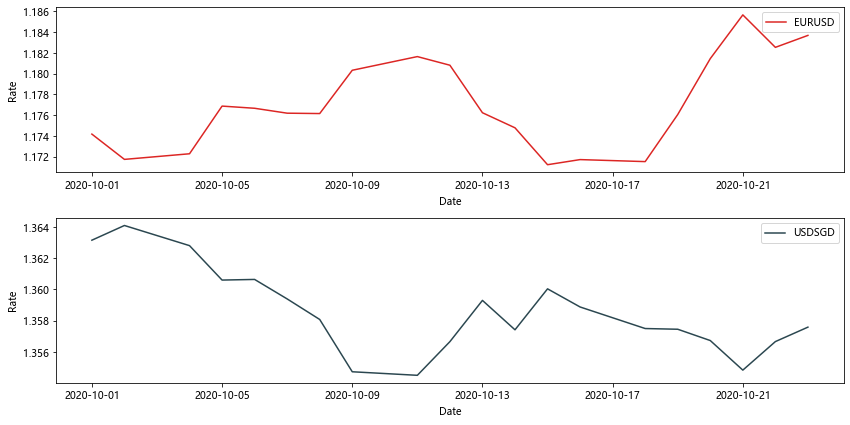

In [25]:
f, axs = plt.subplots(2, 1, figsize=(12, 6))
pairs = ['EURUSD', 'USDSGD']
for c, ax, pair in zip(Hex_color, axs, pairs):
    sns.lineplot(x="Date", y="Rate", ci=None, data=df_pair.query(f"Pair=='{pair}'"), ax=ax, color=c, label=pair); 
f.tight_layout()

最后展示 EURUSD 每天汇率折线图，那么很显然应该将 col 设置为 Date，为了保证每张子图能看清楚，将 col_wrap 设置为 5 确保每行最多只有 5 幅图。

将注意力集中在第二和三幅图，两图中的折线都不完整。原因是在外汇市场，交易在美国时间每个星期五下午 5 点结束，而在星期天下午 5 点重新开始。图二对应的日期是 2020 年 10 月 2 日星期五，而图三对应的日期是 2020 年 10 月 4 日星期天。

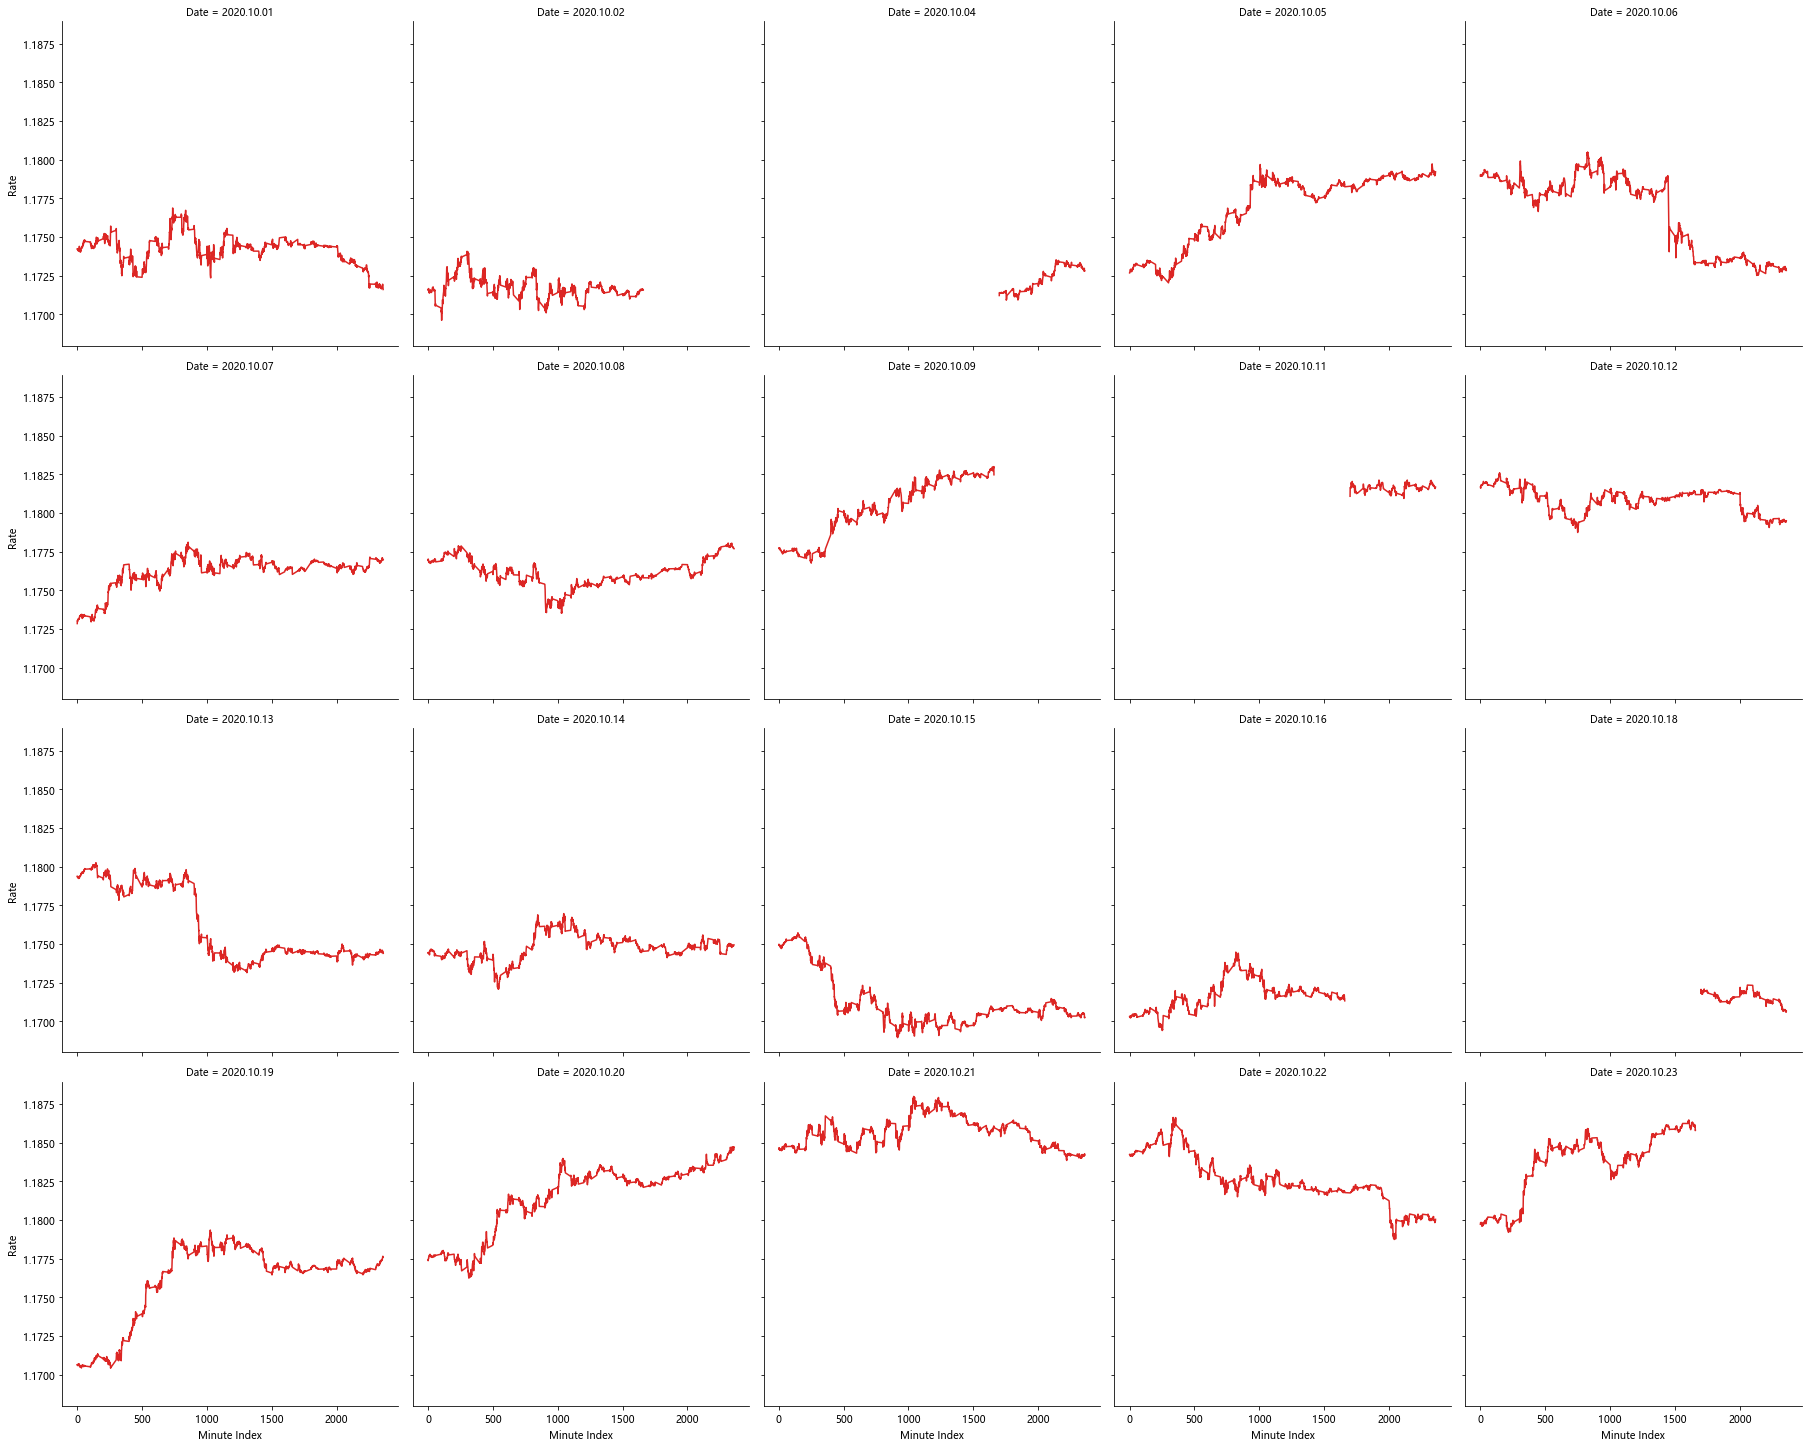

In [26]:
sns.relplot(x="Minute Index", y="Rate", kind="line", col="Date", col_wrap=5, ci=None, data=EURUSD);

### <font color='#2b4750' face='微软雅黑'>2.2 分布图</font><a name='2.2'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

当拿到数据集时，往往首要做的就是了解每个定量型变量是如何分布的。可视化分布图可以回答许多重要问题。比如，观测值覆盖范围是多少？主要趋势是什么？是否严重偏向单方向？是否有双峰现象？是否有明显离群值？ 

为了可视化定量型变量的分布，Seaborn 提供了：

- 图级函数 `displot()`
- 轴级函数 `histplot()`, `kdeplot()`, `ecdfplot()` 和 `rugplot()`

其中 `displot()` 可设置参数 `kind` (默认值是 `hist`) 来确定具体的分布图，当

- `displot(kind='hist')` 等价于 `histplot()`，用来绘制直方图
- `displot(kind='kde')` 等价于 `kdeplot()`，用来绘制核密度图
- `displot(kind='ecdf')` 等价于 `ecdfplot()`，用来绘制 ecdf 图
- `displot(kind='rug')` 等价于 `rugplot()`，用来绘制地毯图

### <font color='black' face='微软雅黑'>直方图</font>

直方图是可视化变量分布的最常见图类型。它将数据划分到多个桶中，然后对每个桶中的样本进行计数，并将它们以长条的形式画出来。绘制直方图两种等价语法代码如下：

- 图级函数：`sns.displot(x='col_x', data=df)`
- 轴级函数：`sns.histplot(x='col_x', data=df)`

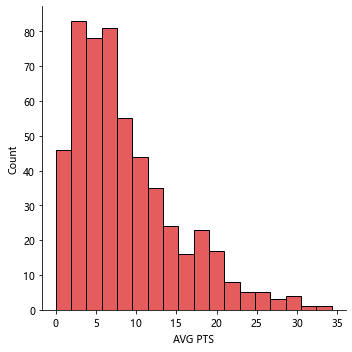

In [27]:
sns.displot(data=NBA, x="AVG PTS");

**桶的属性** - 控制桶的宽度 (`binwidth`) 和个数 (`bins`)。

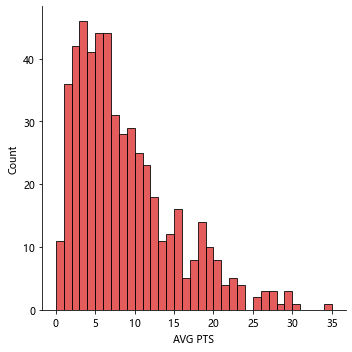

In [28]:
sns.displot(data=NBA, x="AVG PTS", binwidth=1);

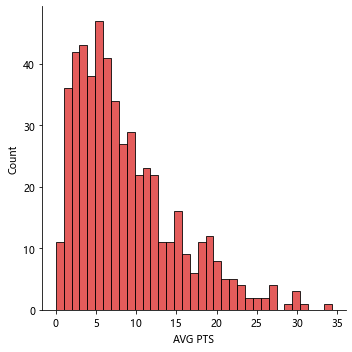

In [29]:
sns.displot(data=NBA, x="AVG PTS", bins=35);

**条形类别** 

在每个区 (division) 中场均得分的分布情况 (在给定 division 变量后的条件分布)。

- 普通情况展示“分层”条形
- 用 `element="step"` 展示“阶梯”条形。
- 用 `multiple="stack"` 展示“堆叠”条形。 
- 用 `multiple="dodge"` 展示“并排”条形，这样可以确保没有重叠，并在高度上保持可比性。但是，仅当分类变量具有少量级别时它才有效。
- 用 `col` 和 `col_wrap` 来绘制多图。

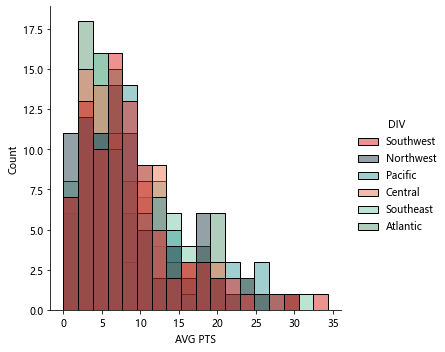

In [30]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV");

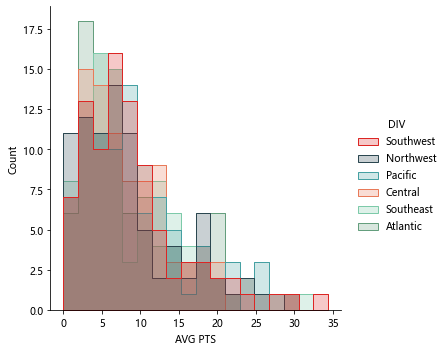

In [31]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", element="step");

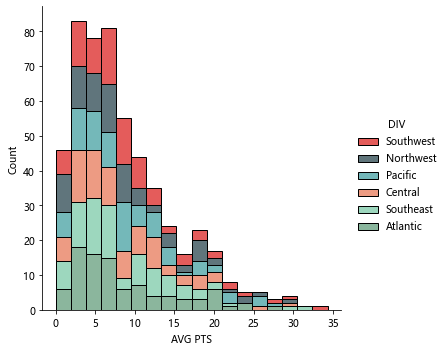

In [32]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", multiple="stack");

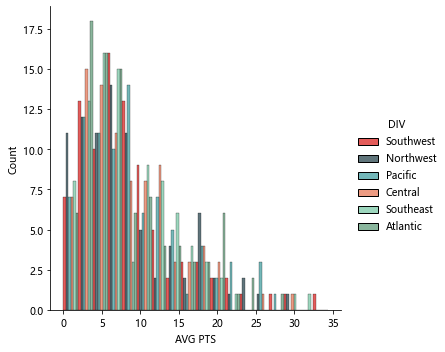

In [33]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", multiple="dodge");

比较上面四种展示方式，普通和阶梯条形太乱，堆叠条形太杂，并排条形太密，根本无法从中读取信息。

问题的本质是因为 DIV 有六个类别，全部画在一幅图中很难清晰的传达信息，因此仅当分类变量的类别少时，使用上述四种展示方式才有效，如果类别过多 (大于三类)，用多图展示会更好些。

将参数 hue 和 col 设置为 ‘DIV’，并控制每列三幅子图来绘制多图，每个区中球员场均得分的分布一目了然。

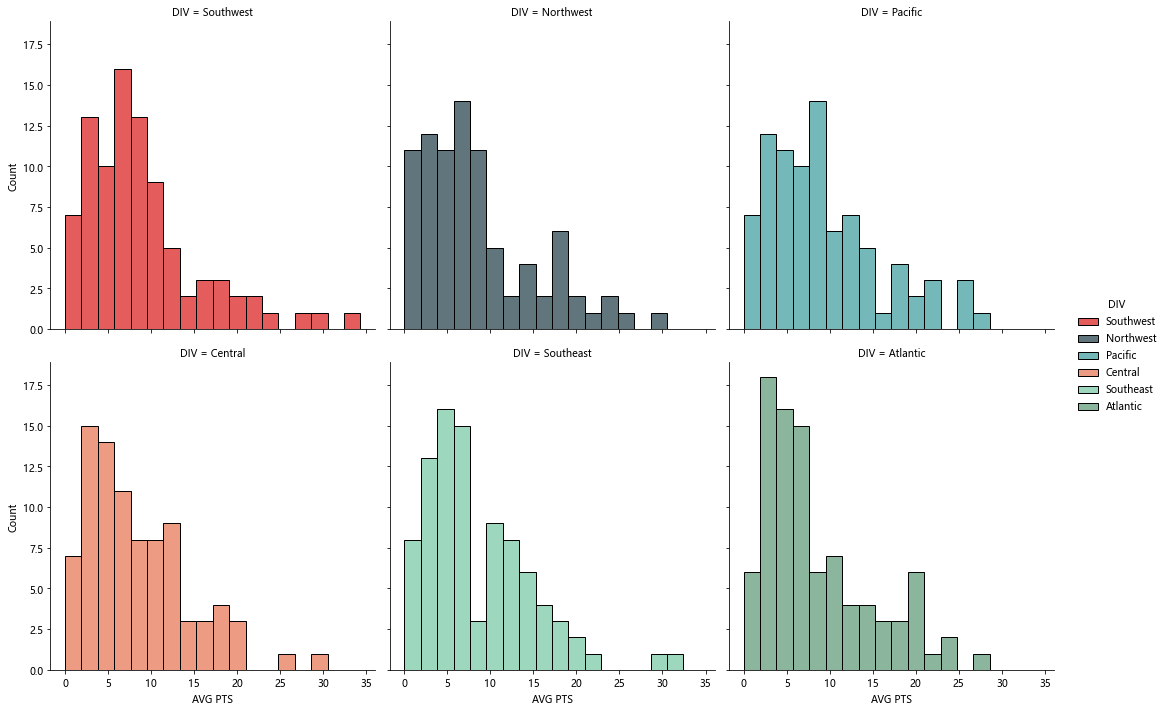

In [34]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", col="DIV", col_wrap=3);

**纵轴标签**

直方图纵轴记录的是每个桶中数据的个数，设置参数 stat="density" 可以标准化数据个数。下两图是一样的，除了纵轴标签的量纲不同，第一个图标签是 Count，记录个数；第二个图标签是 Density，记录密度。

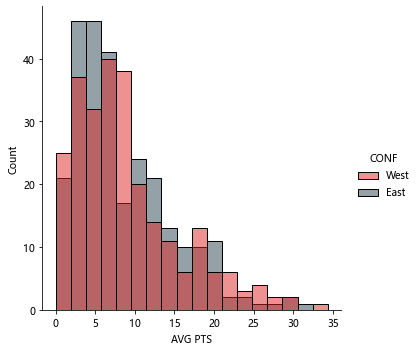

In [35]:
sns.displot(data=NBA, x="AVG PTS", hue="CONF");

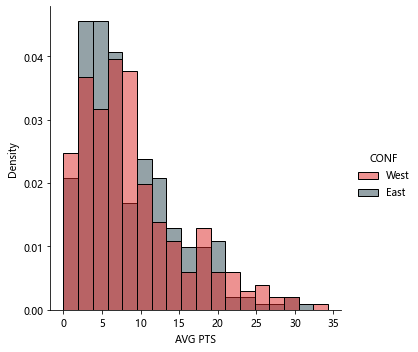

In [36]:
sns.displot(data=NBA, x="AVG PTS", hue="CONF", stat="density");

上图对每个类的数据个数做标准化时除以的是总数据个数，下图设置参数 `common_norm=False` 可分别除以每个类别下的数据个数。

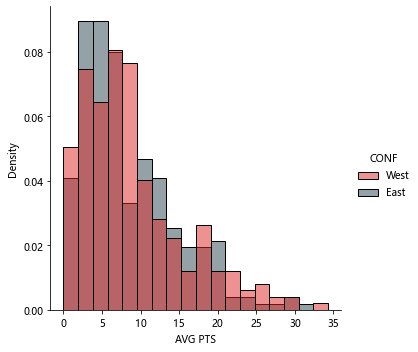

In [37]:
sns.displot(data=NBA, x="AVG PTS", hue="CONF", stat="density", common_norm=False);

当 `stat="density"` 时，所有桶的面积加起来等于 1。下图设置 `stat="probability"`，在该设置下所有桶的高度加起来等于 1，即假设桶的宽度为 1。

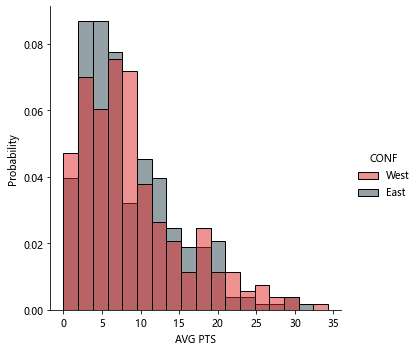

In [38]:
sns.displot(data=NBA, x="AVG PTS", hue="CONF", stat="probability");

### <font color='black' face='微软雅黑'>核密度图</font>

直方图通过对观察值进行分装箱计数来近似生成数据的概率密度函数，KDE 图为相同问题提供了不同的解决方案。绘制核密度图两种等价语法代码如下：

- 图级函数：`sns.displot(x='col_x', data=df, kind='kde')`
- 轴级函数：`sns.kdeplot(x='col_x', data=df)`

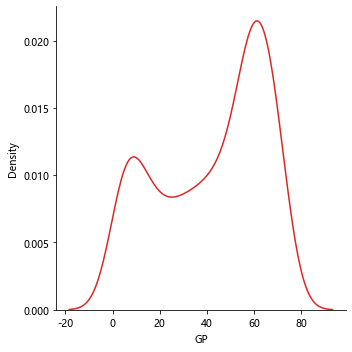

In [39]:
sns.displot(data=NBA, x="GP", kind='kde');

**带宽属性**

检查估计的鲁棒性的最简单方法是调整默认带宽 `bw_adjust`。从下图看，带宽过小使双峰变得更加明显，但曲线变得不那么平滑。相反，带宽过大使得曲线平滑，但几乎完全掩盖了双峰更变成单峰。

- 平滑度过高的估计会抹去数据中重要特征
- 平滑度过低的估计会掩盖数据中随机噪声。

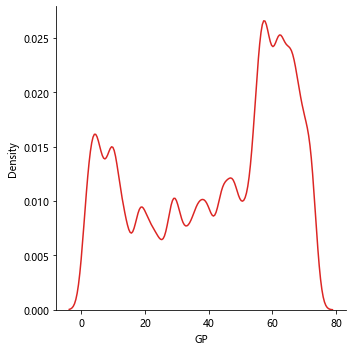

In [40]:
sns.displot(data=NBA, x="GP", kind='kde', bw_adjust=0.25);

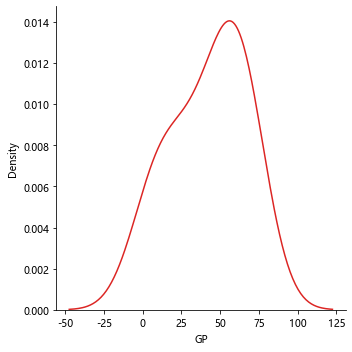

In [41]:
sns.displot(data=NBA, x="GP", kind='kde', bw_adjust=2.5);

**范围属性**

在计算 KDE 过程中有可能外延数据的最大最小值

- 可以设置参数 `cut=0` 使图绘制在数据值域内
- 也可以设置参数 `clip=[a, b]` 是图绘制在自定义的范围内。

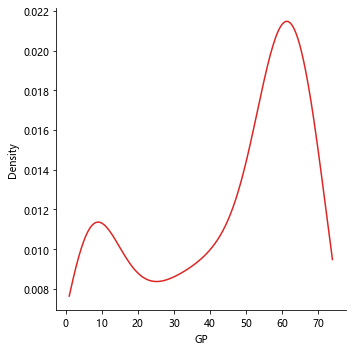

In [42]:
sns.displot(data=NBA, x="GP", kind='kde', cut=0);

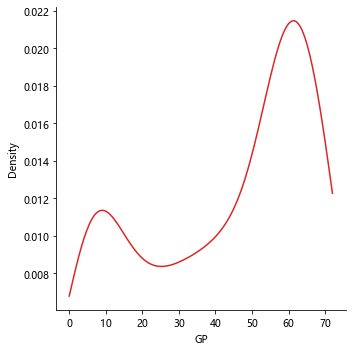

In [43]:
sns.displot(data=NBA, x="GP", kind='kde', clip=[0,72]);

**填充类别** 

在给定其他变量后的条件分布，在每个区 (division) 中场均得分的分布情况。

- 普通情况
- 用 `fill=True` 展示“填充”密度函数
- 用 `multiple="stack"` 展示“堆叠”密度函数
- 用 `multiple="fill"` 展示“河流”密度函数

在许多情况下，分层的 KDE 比分层的直方图更易于解释。

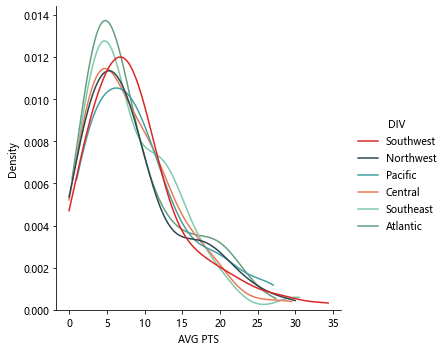

In [44]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", kind='kde', cut=0);

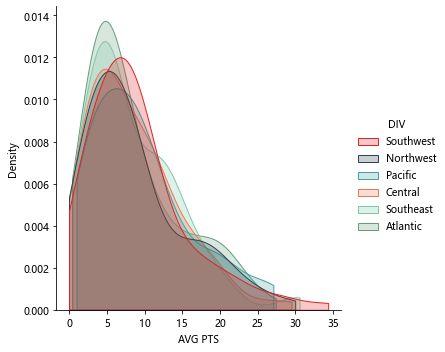

In [45]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", kind='kde', fill=True, cut=0);

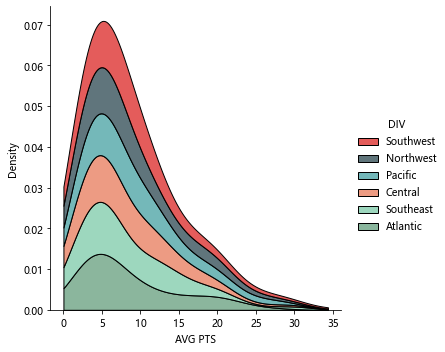

In [46]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", kind='kde', multiple="stack", cut=0);

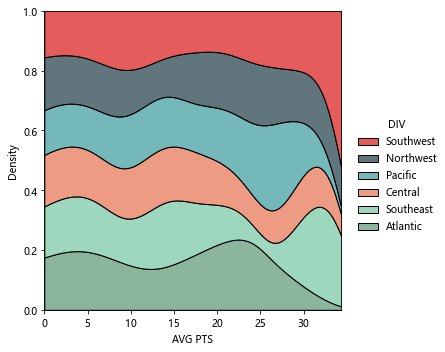

In [47]:
sns.displot(data=NBA, x="AVG PTS", hue="DIV", kind='kde', multiple="fill", cut=0);

### <font color='black' face='微软雅黑'>经验累积分布函数图</font>

经验累积分布函数图 (Empirical Cumulative Distribution Function, ECDF) 是可视化分布的第三种图类型。ECDF 图是可视化分布的第三种图类型。此图通过每个数据点绘制一条单调递增的曲线，用曲线高度反映观察值的比例。绘制 ECDF 图两种等价语法代码如下：

- 图级函数：`sns.displot(x='col_x', data=df, kind='ecdf')`
- 轴级函数：`sns.ecdfplot(x='col_x', data=df)`

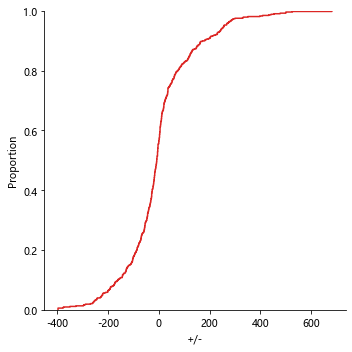

In [48]:
sns.displot(data=NBA, x="+/-", kind="ecdf"); 

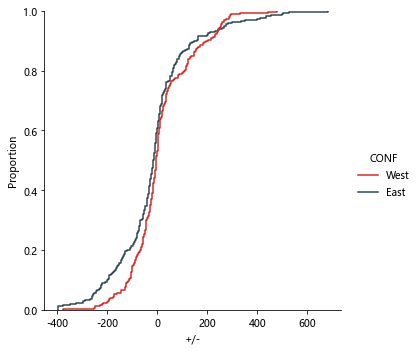

In [49]:
sns.displot(data=NBA, x="+/-", kind="ecdf", hue="CONF");

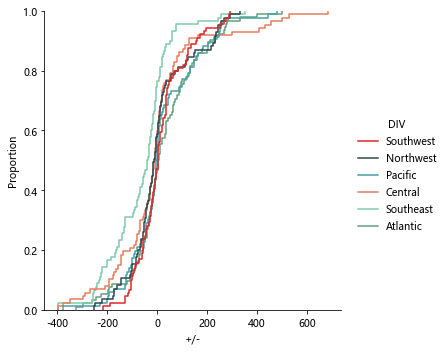

In [50]:
sns.displot(data=NBA, x="+/-", kind="ecdf", hue="DIV");

### <font color='black' face='微软雅黑'>地毯图</font> 

地毯图在每个观测值的位置添加一个垂直的线段小标记，绘制地毯图函数图两种等价语法代码如下：

- 图级函数：`sns.displot(x='col_x', data=df, rug=True)`
- 轴级函数：`sns.rugplot(x='col_x', data=df)`

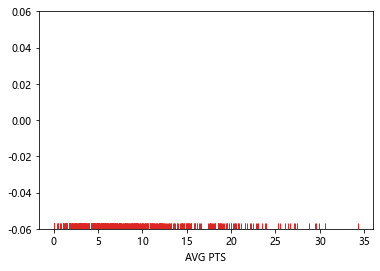

In [51]:
sns.rugplot(data=NBA, x="AVG PTS");

通常它不会单一展示，而是通过设置参数 `rug=True` 配着其他的图一起展示。

**直方图 + 地毯图**

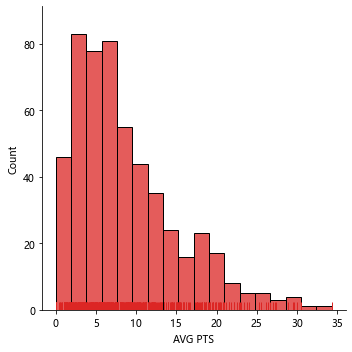

In [52]:
sns.displot(data=NBA, x="AVG PTS", rug=True);

**KDE 图 + 地毯图**

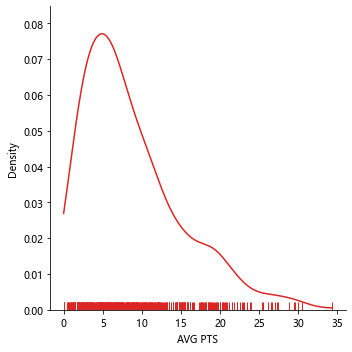

In [53]:
sns.displot(data=NBA, x="AVG PTS", kind="kde", cut=0, rug=True);

**直方图 + KDE 图**

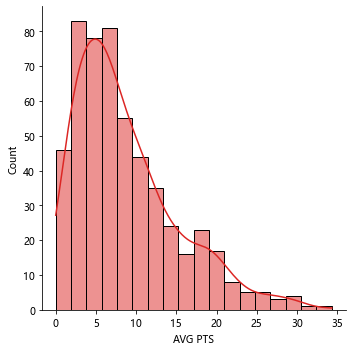

In [54]:
sns.displot(data=NBA, x="AVG PTS", kde=True);

**直方图 + KDE 图 + 地毯图**

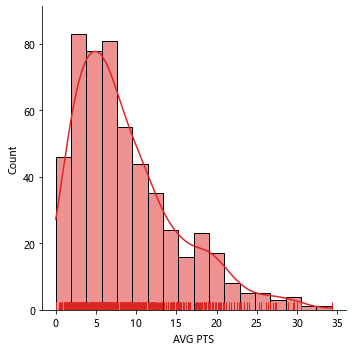

In [55]:
sns.displot(data=NBA, x="AVG PTS", kde=True, rug=True);

### <font color='black' face='微软雅黑'>二维分布图</font> 

到止，所有示例都是单变量 x 分布，或给定第二个变量 y 值 x 的条件分布。接下来展示 x 和 y 的双变量分布图。双变量直方图将数据划分到矩形内 (类比一维图的桶内)，然后使用颜色表示每个矩形内值。

**双变量直方图**

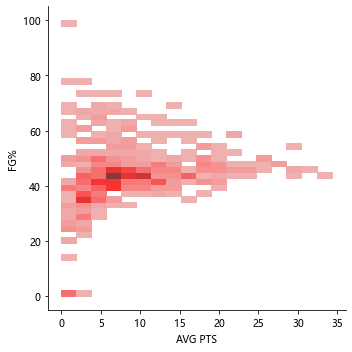

In [56]:
sns.displot(data=NBA, x="AVG PTS", y="FG%");

**双变量 KDE 图**

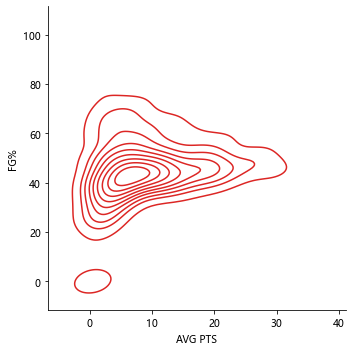

In [57]:
sns.displot(data=NBA, x="AVG PTS", y="FG%", kind="kde");

和单变量条件分布一样，还可用设置色调参数 hue 来展示双变量条件分布。

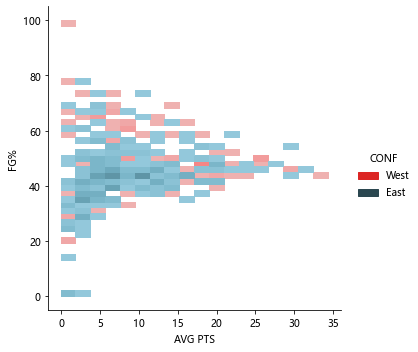

In [58]:
sns.displot(data=NBA, x="AVG PTS", y="FG%", hue="CONF");

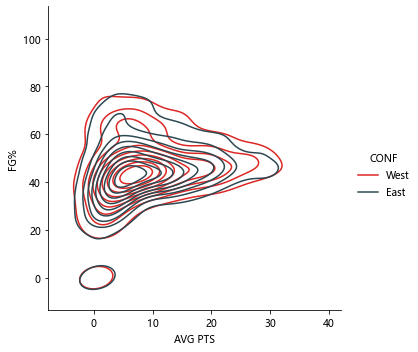

In [59]:
sns.displot(data=NBA, x="AVG PTS", y="FG%", kind="kde", hue="CONF");

所有图都可以用参数来做客制化。比如为了帮助解释直方图，添加色栏 (color bar) 以显示数值和颜色强度之间的关系。

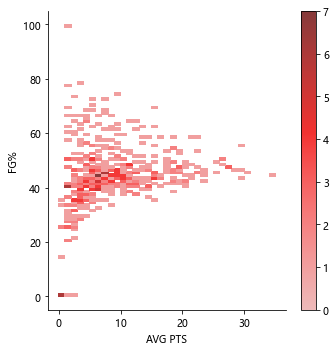

In [60]:
sns.displot(data=NBA, x="AVG PTS", y="FG%", binwidth=(1, 1), cbar=True);

在 KDE 图中，可以调节最低数据占比 (thesh) 和等高线的层数 (level)

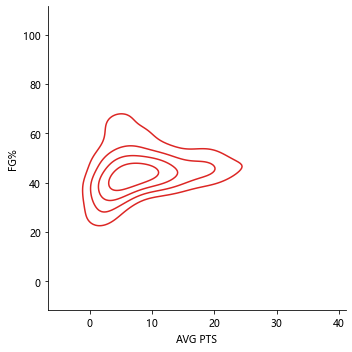

In [61]:
sns.displot(data=NBA, x="AVG PTS", y="FG%", kind="kde", thresh=0.2, levels=5);

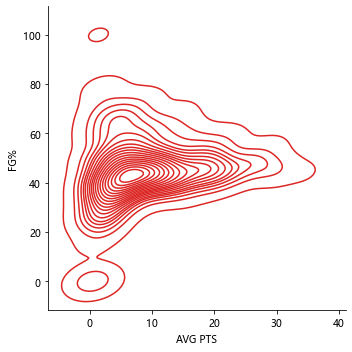

In [62]:
sns.displot(data=NBA, x="AVG PTS", y="FG%", kind="kde", thresh=0.01, levels=20);

此外，可使用轴级函数 `rugplot()` 在任何类型图的两边添加地毯分布。

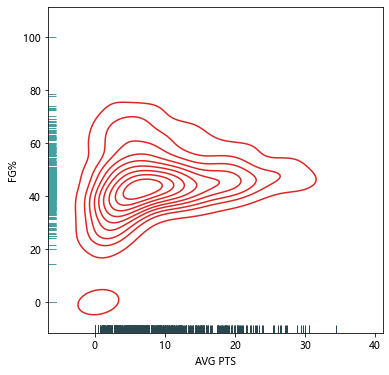

In [63]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=NBA, x="AVG PTS", y="FG%", ax=ax);
sns.rugplot(data=NBA, x="AVG PTS", ax=ax);
sns.rugplot(data=NBA, y="FG%", ax=ax);

也可以任意设计调色板来更改色调并使 KDE 密度以更加连续的形式展示出来。

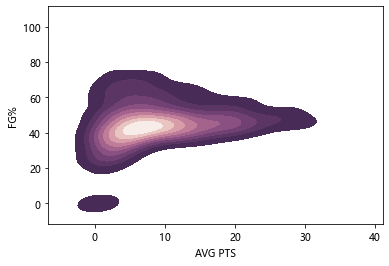

In [64]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.2, light=1, reverse=True)
sns.kdeplot(data=NBA, x="AVG PTS", y="FG%", cmap=cmap, shade=True);

### <font color='#2b4750' face='微软雅黑'>2.3 分类图</font><a name='2.3'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

在关系图那节使用散点图和线形图来展示数据集中多个变量之间的关系，但是此关系存在于两个数值型 (连续) 变量之间。当其中一个变量是分类型 (离散) 变量时，Seaborn 有更针对性的可视化方法，其图级和轴级函数如下：

- 图级函数 `catplot()`

- 轴级函数：

    - **<font color='red' face='微软雅黑'>分类散点图</font>** `stripplot()` 和 `swarmplot()`
    - **<font color='blue' face='微软雅黑'>分类分布型</font>** `boxplot()`, `boxenplot()` 和 `violinplot()`
    - **<font color='green' face='微软雅黑'>分类估计型</font>** `barplot()`, `countplot()` 和 `pointplot()`

其中 `catplot()` 可设置参数 `kind` (默认值是 `strip`) 来确定具体的分布图，分类图可分为三大类：

- **<font color='red' face='微软雅黑'>类型一分类散点图</font>** `catplot(kind='strip')`   等价于 `stripplot()`， 用来绘制条纹图
- **<font color='red' face='微软雅黑'>类型一分类散点图</font>** `catplot(kind='swarm')`   等价于 `swarmplot()`， 用来绘制蜂群图
- **<font color='blue' face='微软雅黑'>类型二分类分布图</font>** `catplot(kind='box')`       等价于 `boxplot()`，   用来绘制箱形图
- **<font color='blue' face='微软雅黑'>类型二分类分布图</font>** `catplot(kind='boxen')`   等价于 `boxenplot()`， 用来绘制箱形图
- **<font color='blue' face='微软雅黑'>类型二分类分布图</font>** `catplot(kind='violin')` 等价于 `violinplot()`，用来绘制提琴图
- **<font color='green' face='微软雅黑'>类型三分类估计图</font>** `catplot(kind='bar')`       等价于 `barlot()`，    用来绘制条形图
- **<font color='green' face='微软雅黑'>类型三分类估计图</font>** `catplot(kind='count')`   等价于 `countplot()`， 用来绘制计数图
- **<font color='green' face='微软雅黑'>类型三分类估计图</font>** `catplot(kind='point')`   等价于 `pointplot()`， 用来绘制点图

### <font color='red' face='微软雅黑'>使用数据</font>

该数据记录着每比贷款信息包含申请人的年龄、收入、工龄等，贷款的目的、评级、金额、利率等，以及贷款良莠 (loan status) 用 0 和 1 表示，0 代表未违约，1 代表违约。

In [65]:
loan = pd.read_csv('Loan.csv')
loan.dropna(axis=0,inplace=True)
loan['loan_grade'] = loan['loan_grade'].astype('category')
loan['person_home_ownership'] = loan['person_home_ownership'].astype('category')
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_intent'] = loan['loan_intent'].astype('category')

loan_s = loan[:1000].append(loan[-1000:])
loan_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  2000 non-null   int64   
 1   person_income               2000 non-null   int64   
 2   person_home_ownership       2000 non-null   category
 3   person_emp_length           2000 non-null   float64 
 4   loan_intent                 2000 non-null   category
 5   loan_grade                  2000 non-null   category
 6   loan_amnt                   2000 non-null   int64   
 7   loan_int_rate               2000 non-null   float64 
 8   loan_status                 2000 non-null   category
 9   loan_percent_income         2000 non-null   float64 
 10  cb_person_default_on_file   2000 non-null   object  
 11  cb_person_cred_hist_length  2000 non-null   int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 149.3+ KB


In [66]:
loan.head(3).append(loan.tail(3))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


### <font color='red' face='微软雅黑'>类型一：分类散点图</font> 
### <font color='black' face='微软雅黑'>条纹图</font> 

条纹图会根据变量 x 的值分类绘制 y 变量的散点图分散图，通过设置“抖动”参数 `jitter` 来选择是否展示数据在每个 x 值下的完整分布。绘制条纹图的两种等价语法代码如下，下面两图分别展示保留和取消抖动的效果。

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df)`
- 轴级函数：`sns.stripplot(x='col_x', y='col_y', data=df)`

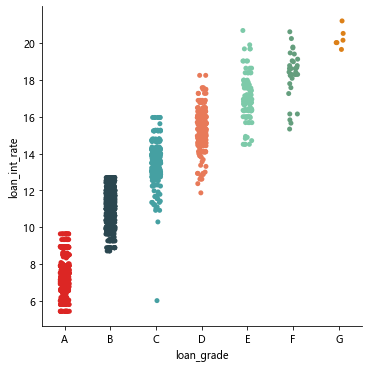

In [67]:
sns.catplot(data=loan_s, x="loan_grade", y="loan_int_rate");

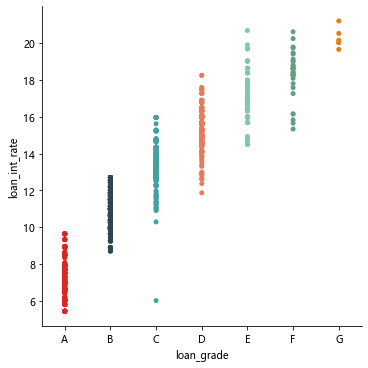

In [68]:
sns.catplot(data=loan_s, x="loan_grade", y="loan_int_rate", jitter=False);

### <font color='black' face='微软雅黑'>蜂群图</font> 

条纹图中抖动是随机设置的，如要避免重叠点，更好的方法是使用蜂群图。绘制蜂群图两种等价语法代码如下：

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df, kind='swarm')`
- 轴级函数：`sns.swarmplot(x='col_x', y='col_y', data=df)`

蜂群图展示的是数据真实分布，为了可视效果更好些，使用小数据集 `loan_s`。

C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


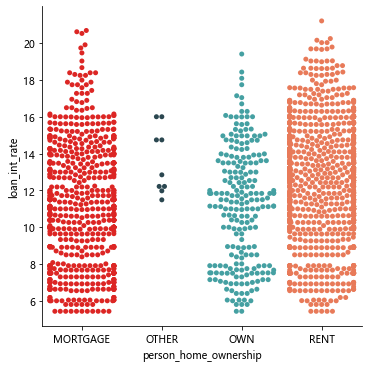

In [69]:
sns.catplot(data=loan_s, x="person_home_ownership", y="loan_int_rate", kind="swarm");

C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.p

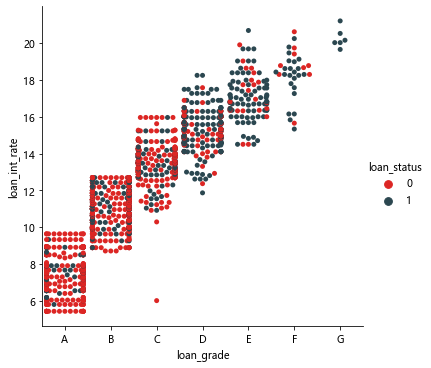

In [70]:
sns.catplot(data=loan_s, x="loan_grade", y="loan_int_rate", hue="loan_status", kind="swarm");

当类别名称较长或类别很多时，可通过交换 x 和 y 的变量来转置图的方向。

C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.p

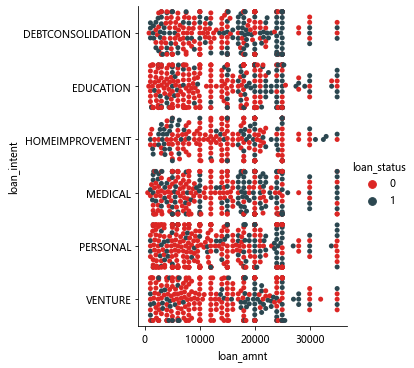

In [71]:
sns.catplot(data=loan_s, x="loan_amnt", y="loan_intent", hue="loan_status", kind='swarm');

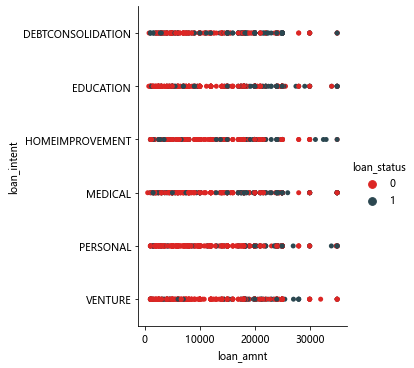

In [72]:
sns.catplot(data=loan_s, x="loan_amnt", y="loan_intent", hue="loan_status", jitter=False);

从上面两图看效果都不理想，图一的蜂群图散点太过拥挤，而图二的条纹图红点蓝点重合。更好的方案是用多图。

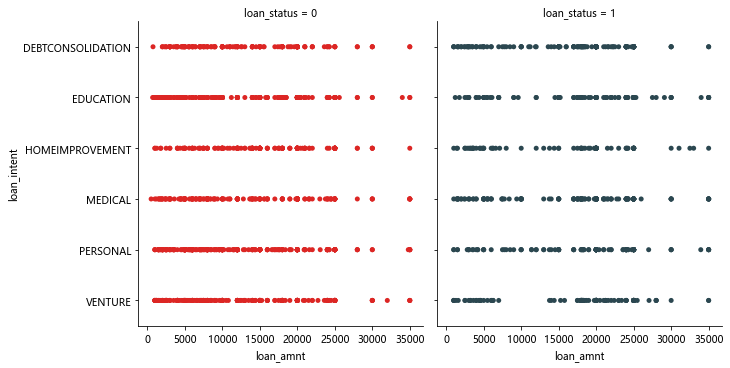

In [73]:
sns.catplot(data=loan_s, x="loan_amnt", y="loan_intent", col="loan_status", hue="loan_status", jitter=False);

分类散点图固然简单实用，但在多数据的时候，它们在表现不同分类的观测值的分布信息时就显得捉襟见肘。此时可用箱形图和提琴图，它们是分类图类型二，称为分类分布图，本质还是分布图，但在分类变量的每个值上进行。

### <font color='blue' face='微软雅黑'>类型二：分类分布图</font> 
### <font color='black' face='微软雅黑'>箱形图</font> 

箱形图在图中展现出数据的

- 最小值 (minimum)
- 上四分位数 (upper quartile, Q1)
- 中位数 (medium, second quartile, Q2)
- 下四分位数 (lower quartile, Q3)
- 最大值 (maximum)

最小值和最大值由箱体上下方的须线 (whiskers) 体现，它们分别向上和向下延伸**<font color='blue'>上下四分位数之间的距离</font>** (Interquartile Range, IQR) 的 1.5 倍，因此

- IQR = Q3 - Q1
- 最小值 = Q1 - 1.5 * IQR
- 最大值 = Q3 + 1.5 * IQR

落在这个区域之外的点会单独显示为离群点 (异常值)。

<img src="box whisker.png" style="width:70%; height:70%;">

绘制箱型图两种等价语法代码如下：

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df, kind='box')`
- 轴级函数：`sns.boxplot(x='col_x', y='col_y', data=df)`

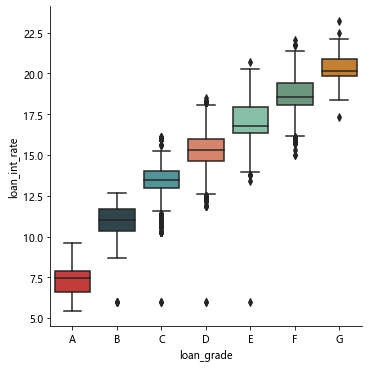

In [74]:
sns.catplot(data=loan, x="loan_grade", y="loan_int_rate", kind="box");

默认情况下，须线扩展到的位置是 1.5 倍 IQR，此外须线还有更多设置，如

- 扩展到 2 倍 IQR，设置 `whis = 2.0`
- 显示第 5 个和第 95 个百分点，设置 `whis = [5, 95]`
- 显示最小值和最大值，设置 `whis = [0, 100]`
- 保持默认的 1.5 倍 IQR，但不显示任何离群点，设置 `sym=""`

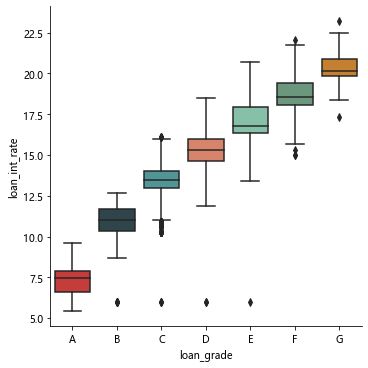

In [75]:
sns.catplot(data=loan, x="loan_grade", y="loan_int_rate", kind="box", whis=2);

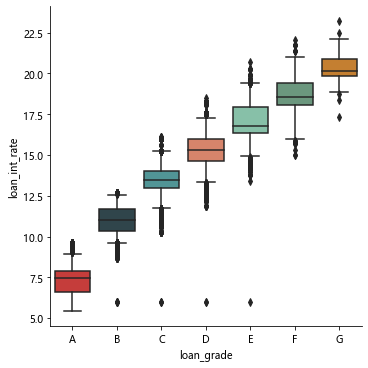

In [76]:
sns.catplot(data=loan, x="loan_grade", y="loan_int_rate", kind="box", whis=[5,95]);

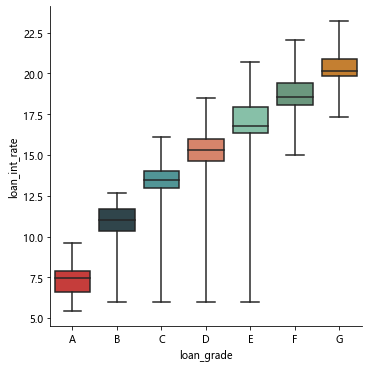

In [77]:
sns.catplot(data=loan, x="loan_grade", y="loan_int_rate", kind="box", whis=[0,100]);

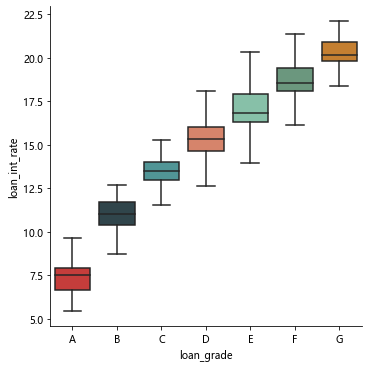

In [78]:
sns.catplot(data=loan, x="loan_grade", y="loan_int_rate", kind="box", sym="");

箱形图还有一款增强版，可以处理更大的数据集并且展示更多分布信息，绘制增强箱形图两种等价语法代码如下：

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df, kind='boxen')`
- 轴级函数：`sns.boxenplot(x='col_x', y='col_y', data=df)`

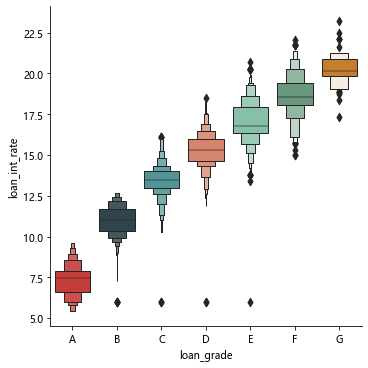

In [79]:
sns.catplot(data=loan, x="loan_grade", y="loan_int_rate", kind="boxen");

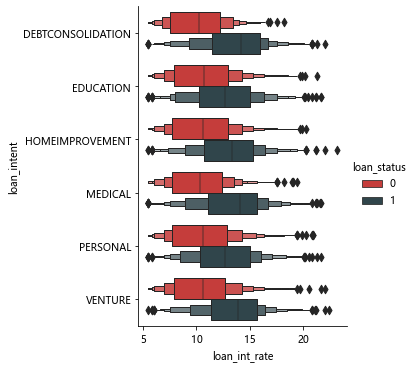

In [80]:
sns.catplot(data=loan, x="loan_int_rate", y="loan_intent", hue="loan_status", kind="boxen");

不难看出，增强箱形图和普通箱形图之间的关系就类似与蜂群图和条纹图的关系。

- 从上图一发现评级越高 (A 相对于 G) 风险越低因此设定的利率也就越低，和上面普通箱形图的信息一致
- 从上图二发现对于不同贷款目的，良莠贷款的利率分布相似，但在每个贷款目的下，良性贷款利率低

### <font color='black' face='微软雅黑'>提琴图</font> 

提琴图结合了箱形图和 KDE 图的特点，绘制提琴图两种等价语法代码如下：

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df, kind='violin')`
- 轴级函数：`sns.violinplot(x='col_x', y='col_y', data=df)`

由于小提琴使用 KDE，还有一些 KDE 图中的参数，比如 `cut`。下两图对比有无箱宽和切点的区别。

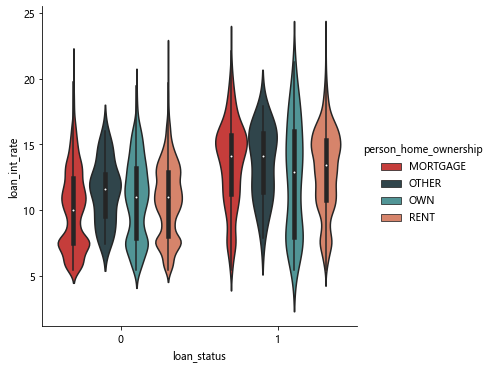

In [81]:
sns.catplot(data=loan, x="loan_status", y="loan_int_rate", hue="person_home_ownership", kind="violin");

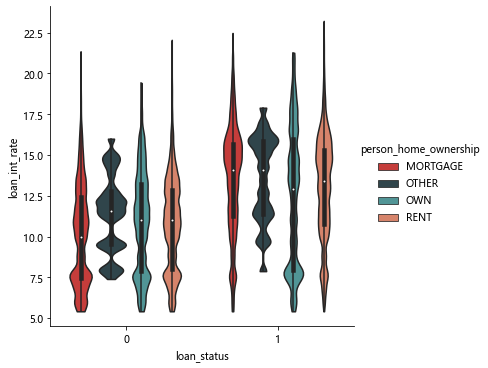

In [82]:
sns.catplot(data=loan, x="loan_status", y="loan_int_rate", hue="person_home_ownership", bw=0.1, cut=0, kind="violin");

当色调参数对应的变量只有两类时，如下的 `loan_status`，可传入参数 `split=True` 来有效地利用空间，因为每个提琴图是对称的，展示一半已经包含完整信息了。下两图对比有无分隔的区别。

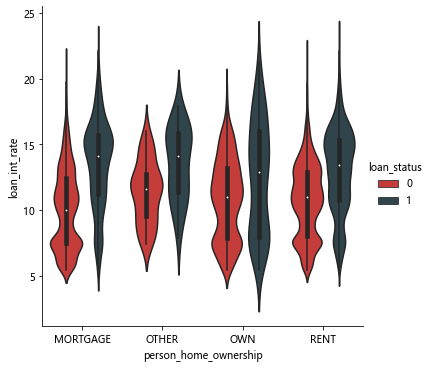

In [83]:
sns.catplot(data=loan, x="person_home_ownership", y="loan_int_rate", hue="loan_status", kind="violin");

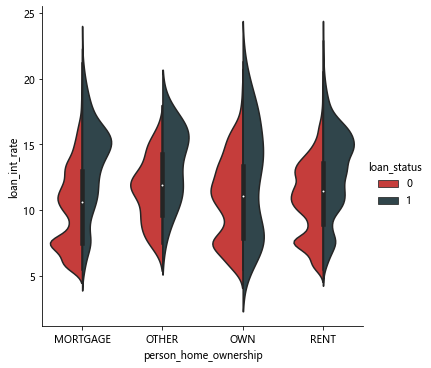

In [84]:
sns.catplot(data=loan, x="person_home_ownership", y="loan_int_rate", hue="loan_status", split=True, kind="violin");

最后设置参数 `inner="quartiles"` 在提琴图上添加分位线，展示更多分布信息。

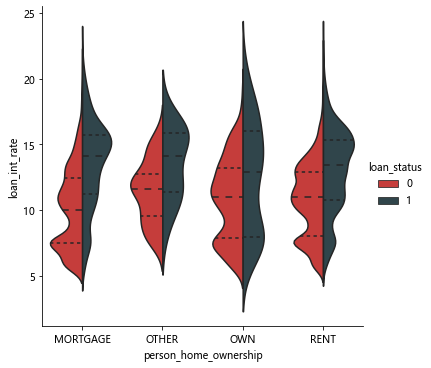

In [85]:
sns.catplot(data=loan, x="person_home_ownership", y="loan_int_rate", hue="loan_status", 
                       inner="quartiles", split=True, kind="violin");

如果想添加蜂群图的话，那需要用到轴级函数，首先将提琴图对象赋值给 g，然后绘制蜂群图，并将其轴参数 ax=g.ax 将峰群样式的散点内嵌在提琴图里。

C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


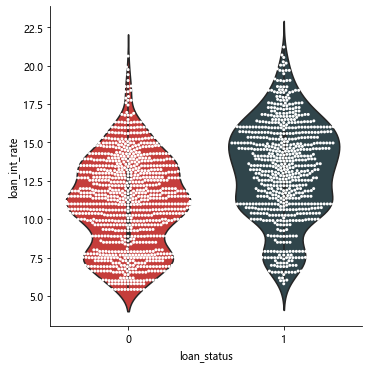

In [86]:
g = sns.catplot(data=loan_s, x="loan_status", y="loan_int_rate", kind="violin");
sns.swarmplot(data=loan_s, x="loan_status", y="loan_int_rate", color="w", size=3, ax=g.ax);

除了显示每个类别中的数据分布情况，有时还希望显示数据趋势，此时可使用条形图、计数图和点图。它们是分类图类型三，称为分类估计图，本质还是分布图，但在分类变量的每个值上进行。

### <font color='green' face='微软雅黑'>类型三：分类估计图</font> 

在某些应用场景中，相对于展示每个分类的数据分布，可能更想展示每个分类中数据的统计量，比如个数、均值、中位数、方差等。

### <font color='black' face='微软雅黑'>条形图</font> 

条形图计算按分类变量值下的数据统计量 (默认均值)。当每个分类中有多值时，它可通过自助采样法计算一个置信区间，并且通过误差棒的方式绘制出来。绘制条形图两种等价语法代码如下。

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df, kind='bar')`
- 轴级函数：`sns.barplot(x='col_x', y='col_y', data=df)`

下图展示每类贷款状态下贷款收入比的均值

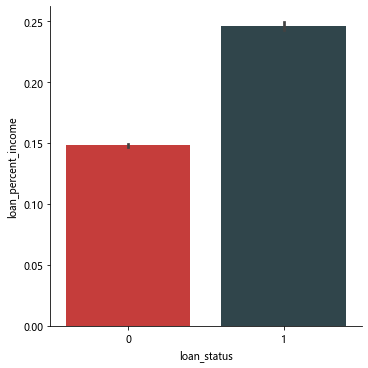

In [87]:
sns.catplot(data=loan, x="loan_status", y="loan_percent_income", kind="bar");

下图展示每类贷款评级下贷款本金的均值

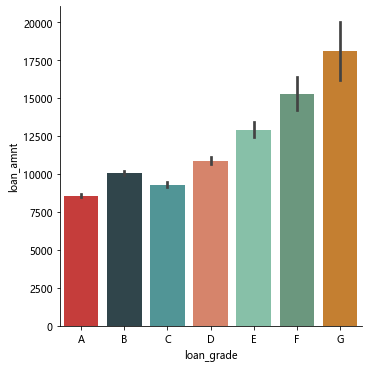

In [88]:
sns.catplot(data=loan, x="loan_grade", y="loan_amnt", kind="bar");

设置参数 `ci=None` 可以不显示误差棒，下两图对比有无显示误差棒的区别。

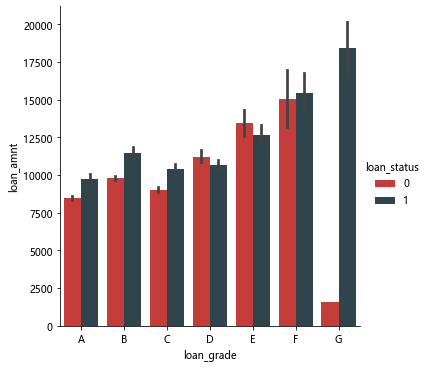

In [89]:
sns.catplot(data=loan, x="loan_grade", y="loan_amnt", hue="loan_status", kind="bar");

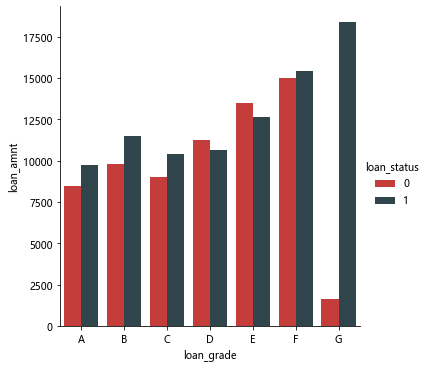

In [90]:
sns.catplot(data=loan, x="loan_grade", y="loan_amnt", hue="loan_status", ci=None, kind="bar");

### <font color='black' face='微软雅黑'>计数图</font> 

如果只想统计每个类别的数据个数 (而不是均值、中位数之类的统计量)，计数图是为此目的而设计的。计数图类似“在分类变量而非连续变量上的直方图”。绘制计数图两种等价语法代码如下。

- 图级函数：`sns.catplot(x='col_x', data=df, kind='count')`
- 轴级函数：`sns.countplot(x='col_x', data=df)`

下图展示每类贷款状态下的样本个数

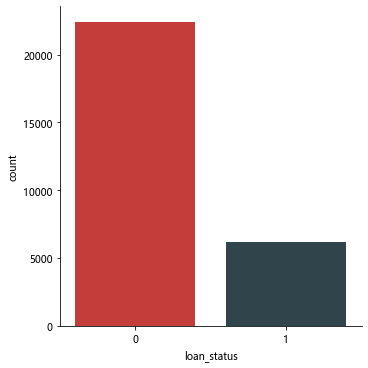

In [91]:
sns.catplot(data=loan, x="loan_status", kind="count");

下图展示每类贷款评级和贷款状态下的样本个数

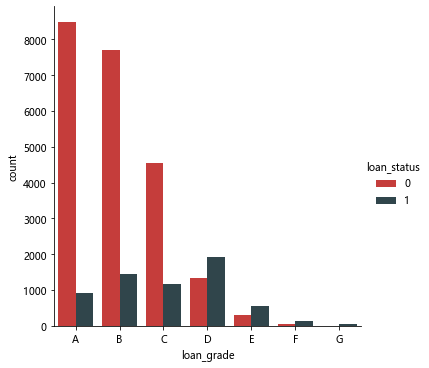

In [92]:
sns.catplot(data=loan, x="loan_grade", hue="loan_status", kind="count");

读者还可以使用上面讨论的所有选项来美化图，如设置参数 `alpha` 来调整透明度

- 0 代表完全透明
- 1 代表完全不透明

设置参数 `edgecolor` 来勾画条形的边线 

- 0 代表黑色
- 1 代表白色

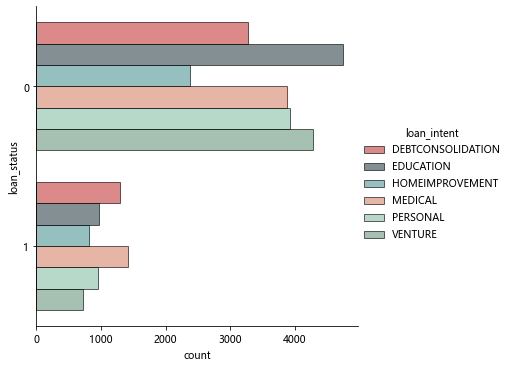

In [93]:
sns.catplot(data=loan, y="loan_status", hue="loan_intent", alpha=0.6, edgecolor="0", kind="count");

### <font color='black' face='微软雅黑'>点图</font>

点图提供了可视化相同信息的另一种风格，它不会画一个完整的条形，而是用一个点以及置信区间来替代；另外，它还会将属于色调 (hue) 分类变量同一个值的点连起来。这样就能很清晰地看到色调变量是如何和坐标轴上的分类变量的交互作用。绘制点图两种等价语法代码如下：

- 图级函数：`sns.catplot(x='col_x', y='col_y', data=df, kind='point')`
- 轴级函数：`sns.pointplot(x='col_x', y='col_y', data=df)`

下图展示每类贷款评级和贷款状态下贷款收入比的趋势

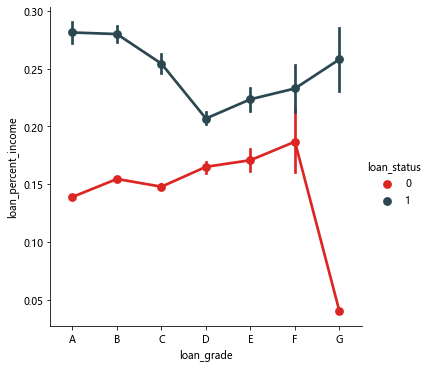

In [94]:
sns.catplot(data=loan, x="loan_grade", y="loan_percent_income", hue="loan_status", kind="point");

下图展示每类贷款状态和贷款评级下贷款利率的趋势

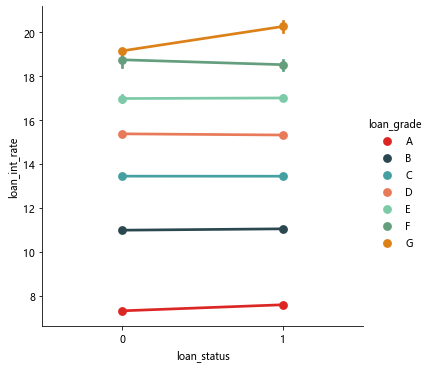

In [95]:
sns.catplot(data=loan, x="loan_status", y="loan_int_rate", hue="loan_grade", kind="point");

设置参数 `ci=None` 可以不显示置信区间，这样可以更容易看到用变量 hue 分类后的变量 y 随着变量 x 的趋势。

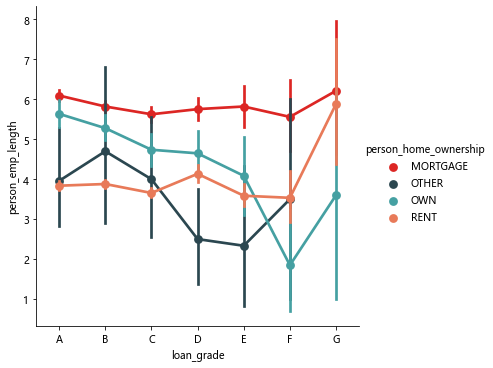

In [96]:
sns.catplot(data=loan, x="loan_grade", y="person_emp_length", hue="person_home_ownership", kind="point");

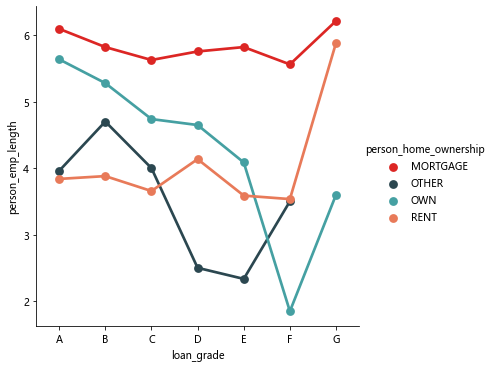

In [97]:
sns.catplot(data=loan, x="loan_grade", y="person_emp_length", hue="person_home_ownership", ci=None, kind="point");

### <font color='#2b4750' face='微软雅黑'>2.4 回归图</font><a name='2.4'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

### <font color='black' face='微软雅黑'>线性回归图</font> 

Seaborn 中有两个函数来展示线性回归，轴级函数 `regplot()` 和图级函数 `lmplot()`。它们共享大多功能，但仍然有区别。

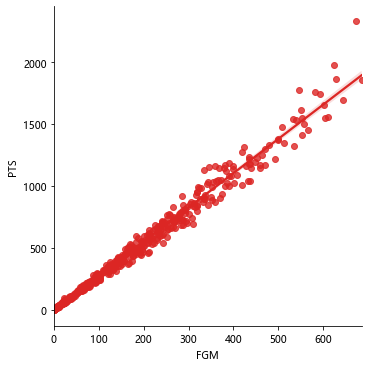

In [98]:
sns.lmplot(data=NBA, x="FGM", y="PTS" );

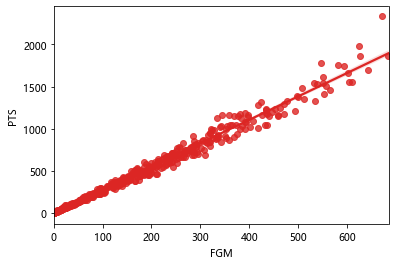

In [99]:
sns.regplot(data=NBA, x="FGM", y="PTS" );

上面两幅图都绘制出来球员总得分 (PTS) 和投篮命中次数 (FGM) 的散点图外带一条拟合直线，不同的时图片大小略有差异。除此之外，两个函数之间最主要的区别在于参数格式 (虽然上例使用的是相同的参数格式)：

- `regplot()` 中的 x 和 y 参数接受多种数据类型：Numpy 数组，Pandas 序列和数据帧的列标签
- `lmplot()` 中必须要设置参数 data，同时 x 和 y 参数必须以字符串形式指定

函数 `regplot()` 在数据输入格式更灵活，但 `lmplot()` 功能更强。

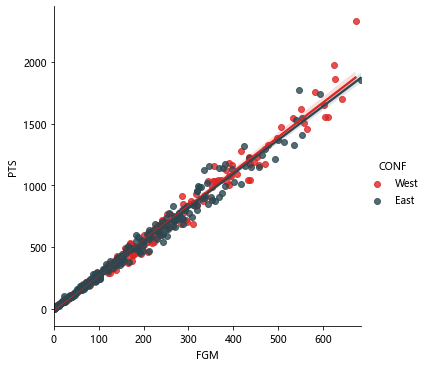

In [100]:
sns.lmplot(data=NBA, x="FGM", y="PTS", hue="CONF" );

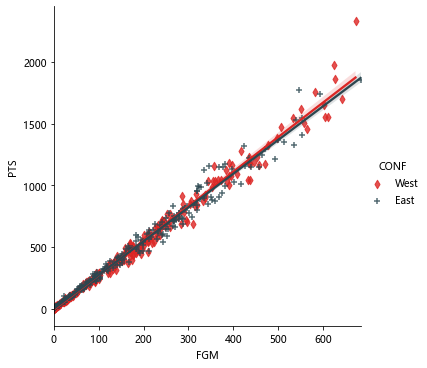

In [101]:
sns.lmplot(data=NBA, x="FGM", y="PTS", markers=['d','+'], hue="CONF" );

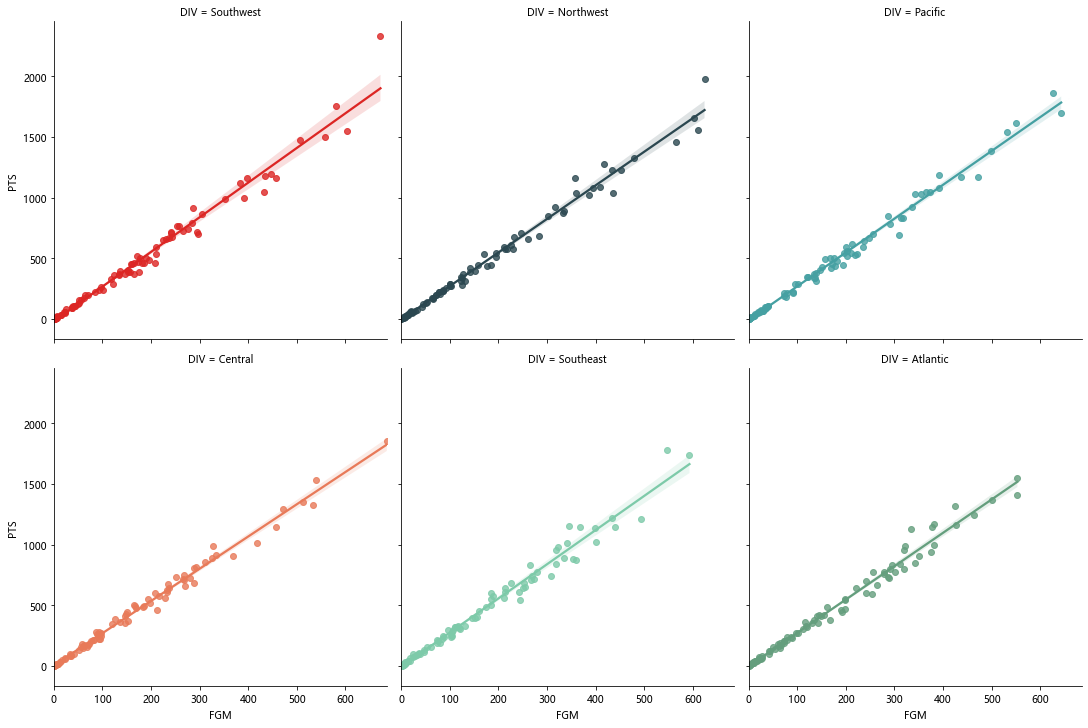

In [102]:
sns.lmplot(data=NBA, x="FGM", y="PTS", hue="DIV", col="DIV", col_wrap=3 );

**离散变量回归**

通常回归的自变量需要是连续变量，但 Seaborn 还支持自变量是离散变量的回归。下例使用球队排名 (RANK) 变量，它数据分类离散变量，NBA 中有 30 球队，因此 RANK 的值是从 1, 2 到 30。接下来将连续变量的球员效率值 (+/-) 在球队排名上做回归。

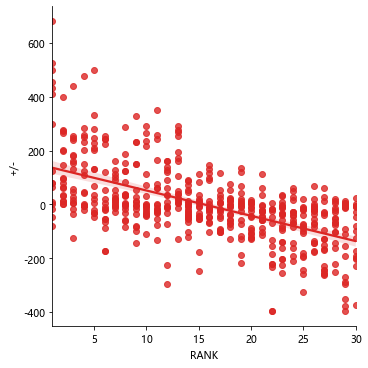

In [103]:
sns.lmplot(data=NBA, x="RANK", y="+/-" );

可设置参数 `x_estimator=np.mean` 只显示每个排名对应的效率值的均值和置信区间。

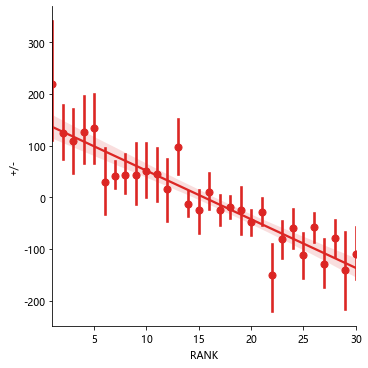

In [104]:
sns.lmplot(data=NBA, x="RANK", y="+/-", x_estimator=np.mean );

下图用多图形式展示按东西部 (CONF) 分类的数据来做线性回归，发现每个球队中的球员效率均值和球队排名是递减关系，不论是东部或西部球队。

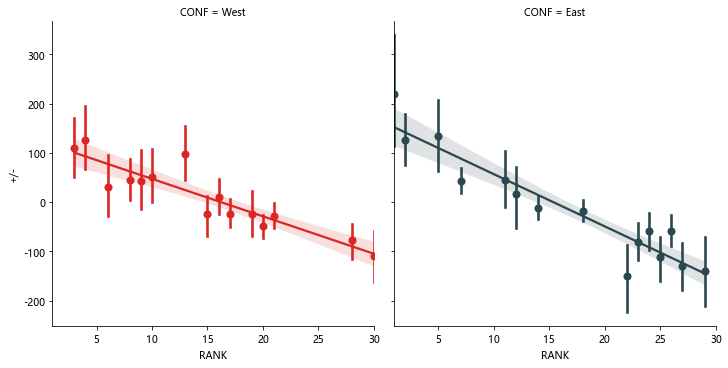

In [105]:
sns.lmplot(data=NBA, x="RANK", y="+/-", x_estimator=np.mean, hue="CONF", col="CONF" );

### <font color='black' face='微软雅黑'>多项式回归</font> 

数据集 anscombe 中类型 Ⅱ 的数据中 x 和 y 明显呈非线性关系，因此从下图一看出直接用线性回归的效果很差，而从下图二看出用二阶多项式回归的效果很好。用 k 阶多项式回归只需在 `lmplot()` 函数中设置参数 `order=k`。

In [106]:
anscombe = sns.load_dataset("anscombe")

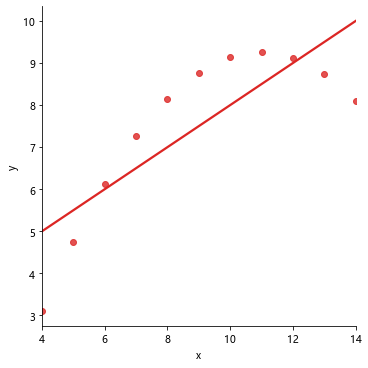

In [107]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None);

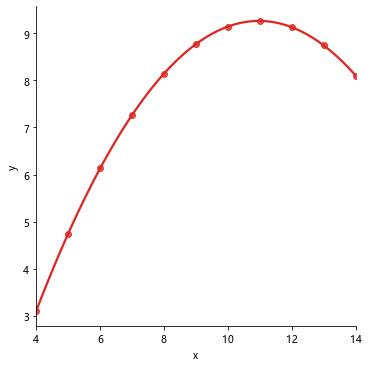

In [108]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None);

### <font color='black' face='微软雅黑'>鲁棒回归</font>

很多原始数据会有异常值，要么直接删除，要么使用鲁棒回归在回归过程中“故意忽略”。数据集 anscombe 中类型 Ⅲ 的数据中就有一个异常值。

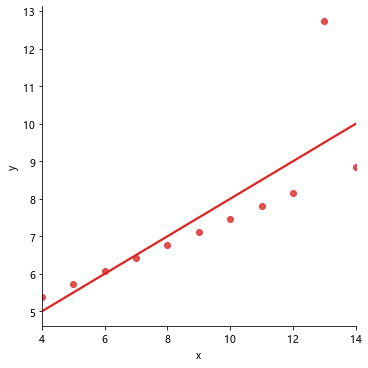

In [109]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None);

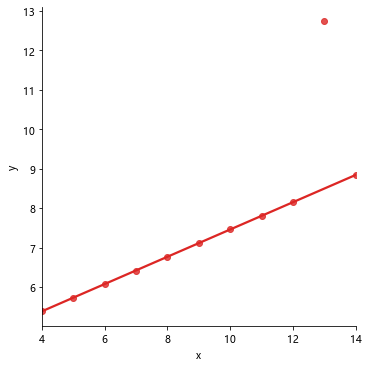

In [110]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None);

### <font color='black' face='微软雅黑'>残差图</font>

当需要检查简单的回归模型拟合表现时，可以用残差图来看。理想情况下，残差值应该随机散布在 y = 0 的附近。从下图一线性回归图和下图二残差图可看出：

- 用投篮命中数 (FGM) 来拟合总得分 (PTS) 的效果好
- 用出场数 (GP) 来拟合罚球命中率 (FT%) 的效果不好

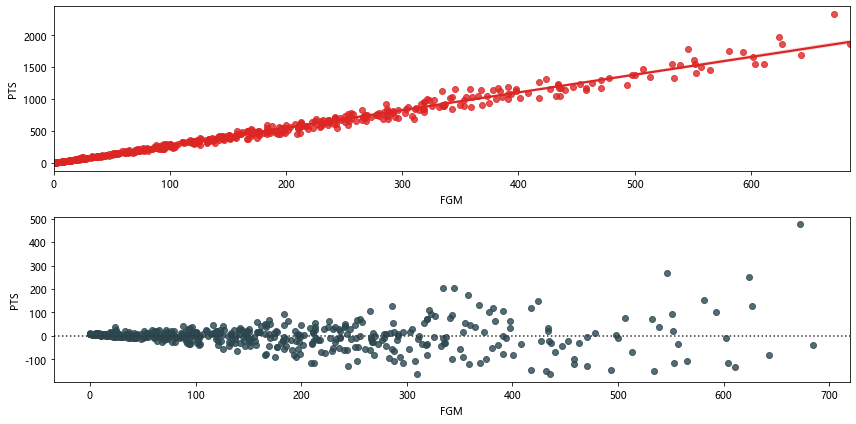

In [111]:
f, axs = plt.subplots(2, 1, figsize=(12, 6))
sns.regplot(data=NBA, x="FGM", y="PTS", ax=axs[0], color=Hex_color[0]);
sns.residplot(data=NBA, x="FGM", y="PTS", ax=axs[1], color=Hex_color[1]);
f.tight_layout()

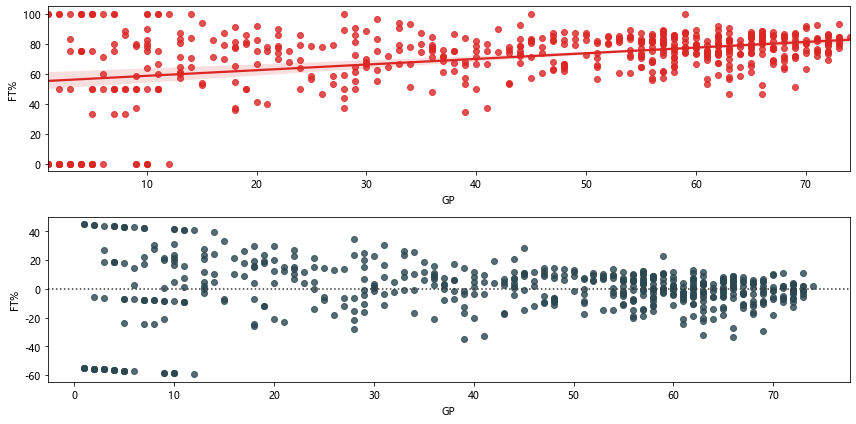

In [112]:
f, axs = plt.subplots(2, 1, figsize=(12, 6))
sns.regplot(data=NBA, x="GP", y="FT%", ax=axs[0], color=Hex_color[0]);
sns.residplot(data=NBA, x="GP", y="FT%", ax=axs[1], color=Hex_color[1]);
f.tight_layout()

### <font color='#2b4750' face='微软雅黑'>2.5 矩阵图</font><a name='2.5'></a>
[<font color='black' face='微软雅黑'>回到章首</font>](#2)

Seaborn 中的矩阵图包括热力图和聚类图，和矩阵相关是因为这两个图都是基于矩阵数据来绘制的。

热力图最早是用矩形色块加上颜色编码来描述一个二维金融市场信息的图，本节使用以下两种数据

- 在纳斯达克交易所上市的 12 个行业市值最大的股票的历史收益率的数据 `df_ret`

        纳斯达克场外证券交易所，按行业分组市值最大的 12 只股票 2019 年 9 月到 2020 年 8 月历史数据

        该数据以 2020 年 8 月 18 日所有纳斯达克交易所有股票公司市值为标准，按 12 个行业划分选出每个行业
        中市值最大的公司，然后从 yahoo finance 按照股票交易代号下载历史数据。


- 美国按郡 (county) 日新冠人数新增数据 `covid`

        美国按郡每天新增新冠人数，截止于 2020 年 10 月27 日

        该数据从 https://github.com/nytimes/covid-19-data 下载并用 pd.crosstab() 加工。

### <font color='black' face='微软雅黑'>热力图</font> 

先用热力图来展示股票数据，首先计算股票历史相关性矩阵。

In [113]:
tickers = ['GOLD', 'TSLA', 'CPRT', 'PEP', 'AMZN', 'PTON', 'CME', 'AMGN', 'PYPL', 'TMUS', 'AAPL', 'CSX']
files = [ os.getcwd() +'\\stock\\' + ticker + '.csv' for ticker in tickers ]
all_dfs = [ pd.read_csv(f, parse_dates=['Date'], index_col='Date') for f in files]
all_price_dfs = [df['Adj Close'] for df in all_dfs]
df = pd.concat(all_price_dfs, axis=1)
df.columns = tickers
data = df['2019-08':'2020-08']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2019-08-01 to 2020-08-18
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOLD    265 non-null    float64
 1   TSLA    265 non-null    float64
 2   CPRT    265 non-null    float64
 3   PEP     265 non-null    float64
 4   AMZN    265 non-null    float64
 5   PTON    226 non-null    float64
 6   CME     265 non-null    float64
 7   AMGN    265 non-null    float64
 8   PYPL    265 non-null    float64
 9   TMUS    265 non-null    float64
 10  AAPL    265 non-null    float64
 11  CSX     265 non-null    float64
dtypes: float64(12)
memory usage: 26.9 KB


In [114]:
data

,GOLD,TSLA,CPRT,PEP,AMZN,PTON,CME,AMGN,PYPL,TMUS,AAPL,CSX
Date,,,,,,,,,,,,
2019-08-01,16.710480,233.850006,76.739998,123.588890,1855.319946,NaN,195.106644,179.750336,110.800003,79.309998,205.601120,66.836655
2019-08-02,16.671043,234.339996,76.139999,124.347107,1823.239990,NaN,199.541779,180.929367,107.089996,77.730003,201.250992,66.185852
2019-08-05,17.341436,228.320007,73.400002,120.925423,1765.130005,NaN,196.351608,175.401550,103.599998,76.190002,190.715927,64.203827
2019-08-06,17.321718,230.750000,74.599998,122.918159,1787.829956,NaN,202.673599,178.262085,105.029999,77.279999,194.326248,65.564613
2019-08-07,17.794935,233.419998,75.050003,124.211014,1793.400024,NaN,203.169632,177.373001,106.629997,76.480003,196.338562,64.972954
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-12,26.180000,1554.760010,99.980003,137.800003,3162.239990,64.360001,169.960007,240.111618,191.320007,115.250000,452.040009,75.029999
2020-08-13,27.139999,1621.000000,100.010002,138.100006,3161.020020,65.709999,169.570007,238.860016,193.070007,115.370003,460.040009,74.000000
2020-08-14,26.990000,1650.709961,100.010002,137.559998,3148.020020,64.339996,171.440002,239.710007,191.460007,115.489998,459.630005,74.250000


In [115]:
df_ret = data.pct_change().dropna()
df_ret.head(3).append(df_ret.tail(3))

,GOLD,TSLA,CPRT,PEP,AMZN,PTON,CME,AMGN,PYPL,TMUS,AAPL,CSX
Date,,,,,,,,,,,,
2019-09-27,-0.020442,-0.001773,-0.014831,-0.000884,-0.008271,-0.020186,-0.009723,-0.002252,-0.022477,-0.018228,-0.004866,-0.007347
2019-09-30,-0.022561,-0.005204,0.007778,0.011062,0.006062,-0.005547,-0.011922,-0.007335,0.013601,0.015601,0.023535,0.005224
2019-10-01,-0.006347,0.015859,-0.009959,0.001969,-0.000150,-0.103187,-0.002934,-0.001654,-0.010233,-0.007236,0.002768,-0.032482
2020-08-14,-0.005527,0.018328,0.000000,-0.003910,-0.004113,-0.020849,0.011028,0.003559,-0.008339,0.001040,-0.000891,0.003378
2020-08-17,0.116339,0.112031,0.011499,0.002617,0.010924,0.014299,0.018490,0.013767,0.025227,0.011949,-0.002611,0.009966
2020-08-18,-0.002987,0.028028,-0.001582,0.001378,0.040875,0.069874,-0.004582,-0.006214,-0.008762,-0.007273,0.008333,-0.007734


In [116]:
corr = df_ret.corr()
corr

,GOLD,TSLA,CPRT,PEP,AMZN,PTON,CME,AMGN,PYPL,TMUS,AAPL,CSX
GOLD,1.000000,0.304479,0.227612,0.308483,0.228754,0.303006,0.288966,0.230291,0.283428,0.185983,0.207853,0.194736
TSLA,0.304479,1.000000,0.400424,0.292197,0.448055,0.115286,0.382372,0.251843,0.462558,0.384645,0.440172,0.398462
CPRT,0.227612,0.400424,1.000000,0.676735,0.365277,0.064934,0.545577,0.509367,0.660234,0.527586,0.652790,0.796104
PEP,0.308483,0.292197,0.676735,1.000000,0.503274,0.184460,0.658736,0.755155,0.666371,0.624486,0.718948,0.728681
AMZN,0.228754,0.448055,0.365277,0.503274,1.000000,0.270558,0.375508,0.545173,0.576173,0.507209,0.659060,0.439321
PTON,0.303006,0.115286,0.064934,0.184460,0.270558,1.000000,0.090268,0.167543,0.227499,0.129374,0.167812,0.014217
CME,0.288966,0.382372,0.545577,0.658736,0.375508,0.090268,1.000000,0.520862,0.570653,0.517624,0.562130,0.679363
AMGN,0.230291,0.251843,0.509367,0.755155,0.545173,0.167543,0.520862,1.000000,0.604114,0.496057,0.675647,0.575489
PYPL,0.283428,0.462558,0.660234,0.666371,0.576173,0.227499,0.570653,0.604114,1.000000,0.642882,0.759805,0.697106
TMUS,0.185983,0.384645,0.527586,0.624486,0.507209,0.129374,0.517624,0.496057,0.642882,1.000000,0.621211,0.605744


上表一眼看上去很难快速获取有效信息，人眼对颜色比数字要敏感得多，用热力图表示马上就能识别哪些股票之间相关性强，只需要看除对角线之外颜色很淡的方块对应的行和列的股票名称就行了。

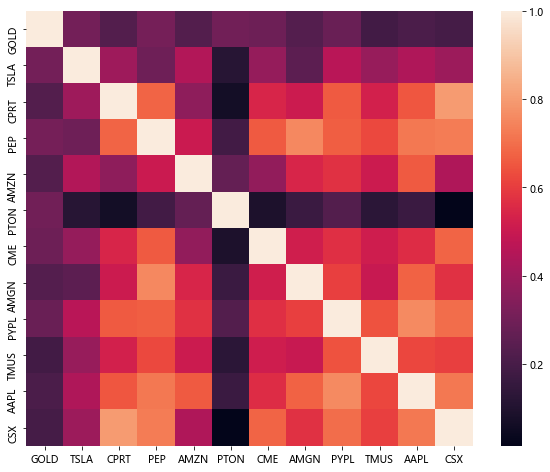

In [117]:
plt.figure(figsize=(10,8))
sns.heatmap(corr);

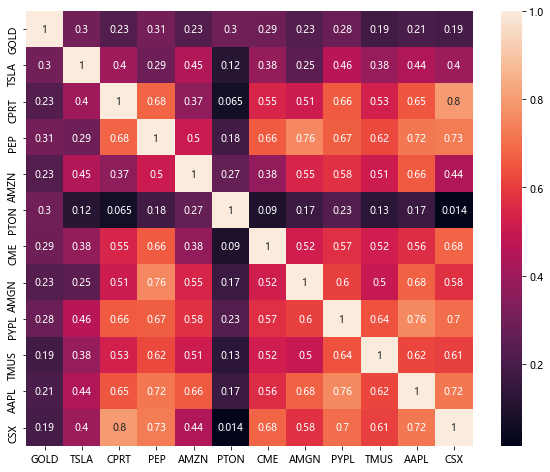

In [118]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True);

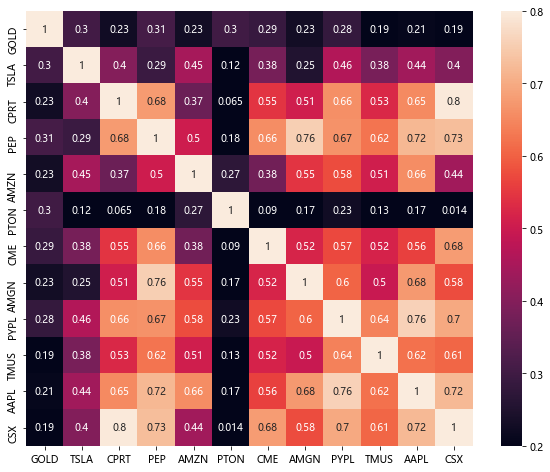

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=0.2, vmax=0.8, annot=True);

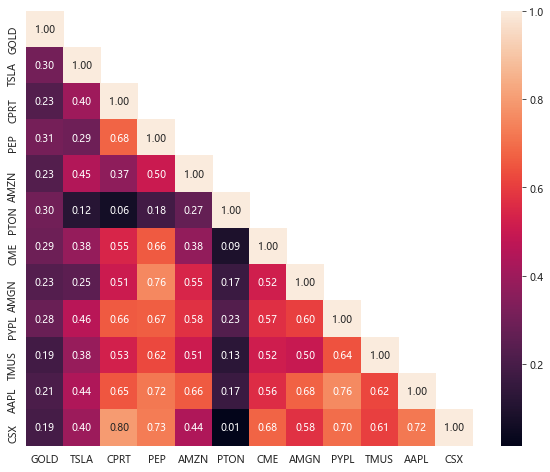

In [120]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, mask=mask, fmt=".2f")

展示完股票数据，再绘制美国按州日新冠人数新增数据的热力图。

In [121]:
state_population = pd.read_csv('state populations.csv', index_col=[0], header=None)
state_population.sort_index(inplace=True)
state_population.head().append(state_population.tail())
state_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       51 non-null     int64
dtypes: int64(1)
memory usage: 816.0+ bytes


In [122]:
covid_US = pd.read_csv('us-counties.csv')
covid_US.head().append(covid_US.tail())
covid_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673878 entries, 0 to 673877
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    673878 non-null  object 
 1   county  673878 non-null  object 
 2   state   673878 non-null  object 
 3   fips    667419 non-null  float64
 4   cases   673878 non-null  int64  
 5   deaths  673878 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 30.8+ MB


In [123]:
df = pd.crosstab(index=covid_US['date'], columns=covid_US['state'], values=covid_US['cases'], aggfunc=np.sum)
df = df.diff().fillna(0)
extra_state = set(df.columns) - set(state_population.index)
df.drop(columns=extra_state, inplace=True)

In [124]:
pct_in_100K = df.values / state_population.T.values * 100000
pct_in_100K[pct_in_100K <0] = 0
covid = pd.DataFrame( data=np.log(1+pct_in_100K), index=df.index, columns=df.columns )
covid.head(2).append(covid.tail(2))

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-10-26,3.033957,3.874324,2.703975,3.056955,2.480613,3.561047,4.061140,3.105227,2.000886,2.824076,...,4.131805,3.532307,3.176892,3.514576,0.956537,2.451288,2.767110,2.922143,4.025067,4.343744
2020-10-27,3.169960,3.968257,2.677313,3.481848,2.594443,3.260765,2.772062,2.234346,2.664426,3.052436,...,4.733294,3.381873,3.270073,3.632611,1.759236,2.660331,2.152809,3.324588,4.528599,4.066374


从图右的红色不难发现从 2020 年 10 月疫情的第二波又开始了。

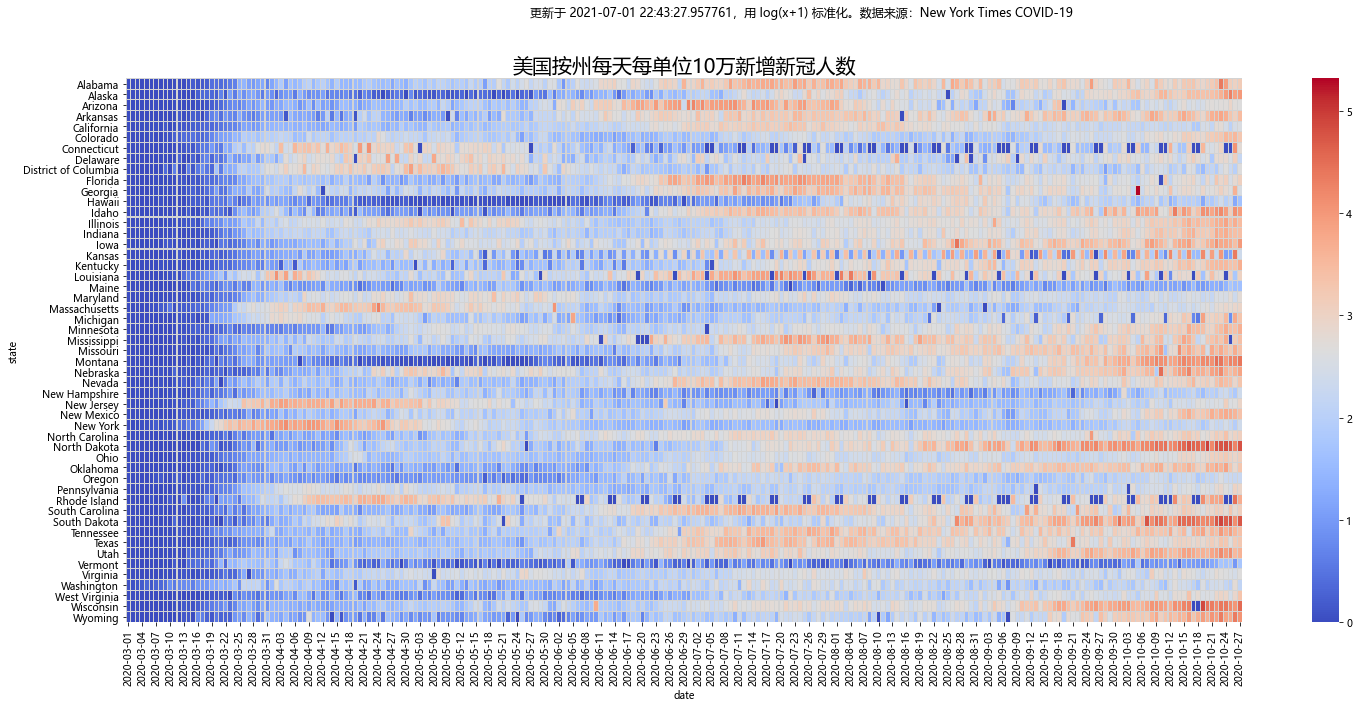

In [125]:
plt.figure(figsize=(25, 10))
sns.heatmap(covid['2020-03-01':].T, cmap="coolwarm", linewidth=0.05, linecolor='lightgrey')
plt.title("美国按州每天每单位10万新增新冠人数", fontsize=20)
s = f"更新于 {str(datetime.today())}，用 log(x+1) 标准化。数据来源：New York Times COVID-19"
plt.suptitle(s, fontsize=12);

### <font color='black' face='微软雅黑'>聚类图</font> 

将 `df_ret` 数据里 11 只股票 1 年历史收益率的数据绘制为分层聚类 (hierarchically-clustered) 的热力图。聚类可以简单理解为使用距离算法将距离相近的数据点簇聚为一类，

- 从图上方水平聚类结果 (图下方是股票名称) 看，(PEP, AMGN) 和 (CPRT, CSX) 这两对的一年的收益率距离最近，而 TSLA 与其余 10 只股票一年的收益率相差甚远，特斯拉在 2019 年 9 月到 2020 年 8 月这段时间的暴涨暴跌，确实“独树一帜”。


- 从图左方竖直聚类结果 (图右方是时间日期) 看信息太过于繁杂，即便找出了哪两天的 11 只股票收益率距离最近，也没有什么实际意义。

In [126]:
df_ret.index = df_ret.index.strftime("%Y-%m-%d")

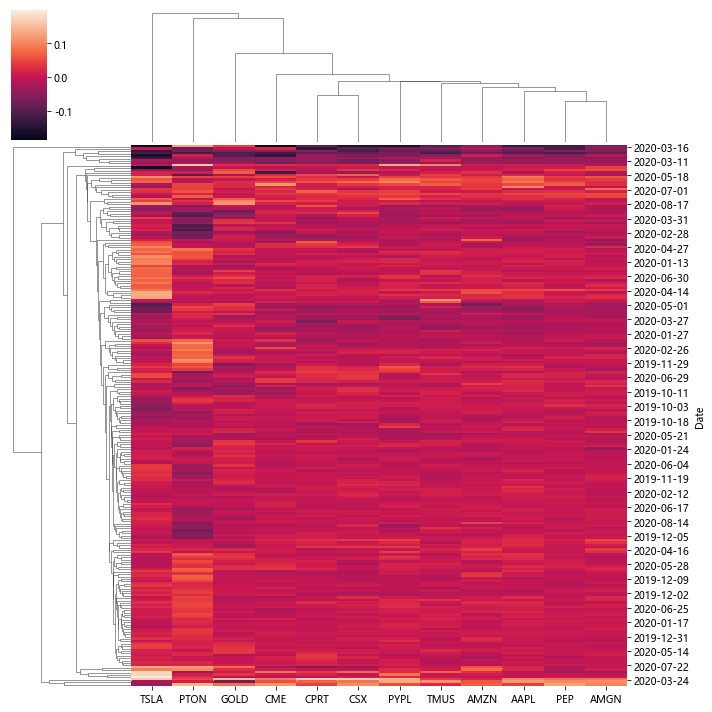

In [127]:
sns.clustermap(df_ret);

将 `covid` 数据里 26 各州从 2020 年 3 月到 10 月的日新增人数绘制为聚类图，

- 从图上方水平聚类结果 (图下方是州名) 看，


    - Vermont, New Hampshire, Massachusetts, New York, Rhode Island 这 5 个州可聚为一类，它们的共性是后期新增人数较少
    - 从 Mississippi 到 Missouri 中间这 8 个州可聚为一类，它们的共性是后期新增人数较多


- 从图左方竖直聚类结果 (图右方是时间日期) 看，


    - 3 月份 (前 5 个日期标签) 可聚为一类 - covid 初期，各州的新增人数都非常少
    - 9 月底到 10 月底 (后 4 个日期标签) 可聚为一类 - covid 第二波，绝大多州的新增人数都激增了

C:\Users\WangShengyuan\anaconda3\lib\site-packages\seaborn\matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


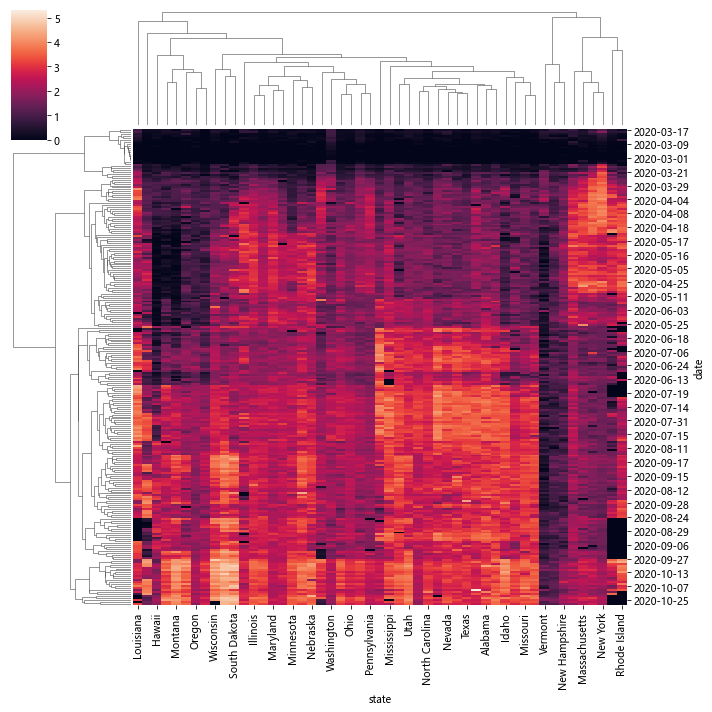

In [128]:
sns.clustermap(covid['2020-03-01':]);

***
# <div style="text-align: center"><font color='green'>Cheatsheet</font> <a name="cs"></a></div> 
***
<img src="Seaborn Cheatsheet.png" style="width:1000;height:1000;">